## PROBLEM STATMENT

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

INPUT - Wins(W), Runs(R), At Bat (AB), Hits(H), Doubles(2B), Triples(3B), HomeRuns(HR), Walk(BB),Strikeouts(SO), Stolen Base(SB), Run Average(RA), Earned Runs(ER), Earned Runs Average(ERA), Complete Game(CG), Shutout(SHO), Saves(SV), Errors (E)

OUTPUT - Number of Pridicted Wins(W)

##### IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

##### IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [2]:
bb_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
bb_df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [4]:
bb_df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [4]:
bb_df.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

In [5]:
bb_df.shape

(30, 17)

In [6]:
bb_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

The columns names given in the dataset is hard to understand by everyone, so we are making it into the understandable format. For which I have take some baseball termnology refernce from Wikipedia for better understanding.

### I Pitching Stastistics:

. W - Win :This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their        team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

. RA - Run Average : This indicates the Runs scored.

. ER - Earned Runs : It refers to any run that was fully enabled by the offensive team's production in the face of                competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

. ERA - Earned Runs Average :

. CG - Complete Game :

. SHO - Shutout : It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing           team to score a run: number of complete games pitched with no runs allowed.

. SV - Save : It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances:           number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering           the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the         game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more                 innings.

### II Bating Stastistics

. R - Runs: This indicates Runs scored.Number of times a player crosses home plate.

. AB - At Bat: This means At bat or time at bat. It's is a batter's turn batting against a pitcher.

. H - Hit: It's also called a "base hit", reaching base because of a batted, fair ball without error by the defense.

. 2B - Double: This means the act of a batter striking the pitched ball and safely reaching second base without being              called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on        a fielder's choice.A double is a type of hit (the others being the single, triple and home run) and is sometimes            called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the                    contribution of a fielding error.

. 3B - Triple: It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a        fielder's misplay nor another runner being put out on a fielder's choice.A triple is sometimes called a "three-            bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a              fielding error.

. HR - Home Runs: Hits on which the batter successfully touched all four bases, without the contribution of a fielding            error.

. BB - Base on Ball(Walk): Hitter not swinging at four pitches called out of the strike zone and awarded first base.

. SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It             usually means that the batter is out: number of batters who received strike three.

### III Base Running Stastistics

. SB - Stolen Base: Number of bases advanced by the runner while the ball is in the possession of the defense.

. R - Runs: Number of times a player crosses home plate.

### III Fielding Stastistics 

.E - Errors: Number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

###### Since, now we have the proper understanding about all the abbreviation and their meanings, we will rename the columns for the better understanding.

In [7]:
bb_df.rename(columns={'W' : 'Wins', 'R' : 'Runs', 'AB' : 'At Bat', 'H' : 'Hits','2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs','BB' : 'Base on Balls(K)','SO':'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average','ER' : 'Earned Runs','ERA' : 'Earned Runs Average', 'CG' : 'Complete Game','SHO' : 'ShutOuts','SV' : 'Saves','E':'Errors'}, inplace = True)

In [8]:
bb_df.head()

Wins  Runs  At Bat  Hits  Doubles  Triples  Home Runs  Base on Balls(K)  \
0    95   724    5575  1497      300       42        139               383   
1    83   696    5467  1349      277       44        156               439   
2    81   669    5439  1395      303       29        141               533   
3    76   622    5533  1381      260       27        136               404   
4    74   689    5605  1515      289       49        151               455   

   Strike Outs  Stolen Base  Runs Average  Earned Runs  Earned Runs Average  \
0          973          104           641          601                 3.73   
1         1264           70           700          653                 4.07   
2         1157           86           640          584                 3.67   
3         1231           68           701          643                 3.98   
4         1259           83           803          746                 4.64   

   Complete Game  ShutOuts  Saves  Errors  
0              2         8     56      88  
1              2        12     45      86  
2             11        10     38      79  
3              7         9     37     101  
4              7        12     35      86

In [9]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wins                 30 non-null     int64  
 1   Runs                 30 non-null     int64  
 2   At Bat               30 non-null     int64  
 3   Hits                 30 non-null     int64  
 4   Doubles              30 non-null     int64  
 5   Triples              30 non-null     int64  
 6   Home Runs            30 non-null     int64  
 7   Base on Balls(K)     30 non-null     int64  
 8   Strike Outs          30 non-null     int64  
 9   Stolen Base          30 non-null     int64  
 10  Runs Average         30 non-null     int64  
 11  Earned Runs          30 non-null     int64  
 12  Earned Runs Average  30 non-null     float64
 13  Complete Game        30 non-null     int64  
 14  ShutOuts             30 non-null     int64  
 15  Saves                30 non-null     int64

###### From the above information, we can see that dataset has only numeric data and none of the columns have catergorical data.

## OBJECTIVE:

To develop and machine Learning Regression based algorithm that predicts the number of wins fro a given team based on features. Here Wins is target variable and others are Input features.

### Statistical Analyses

<Axes: >

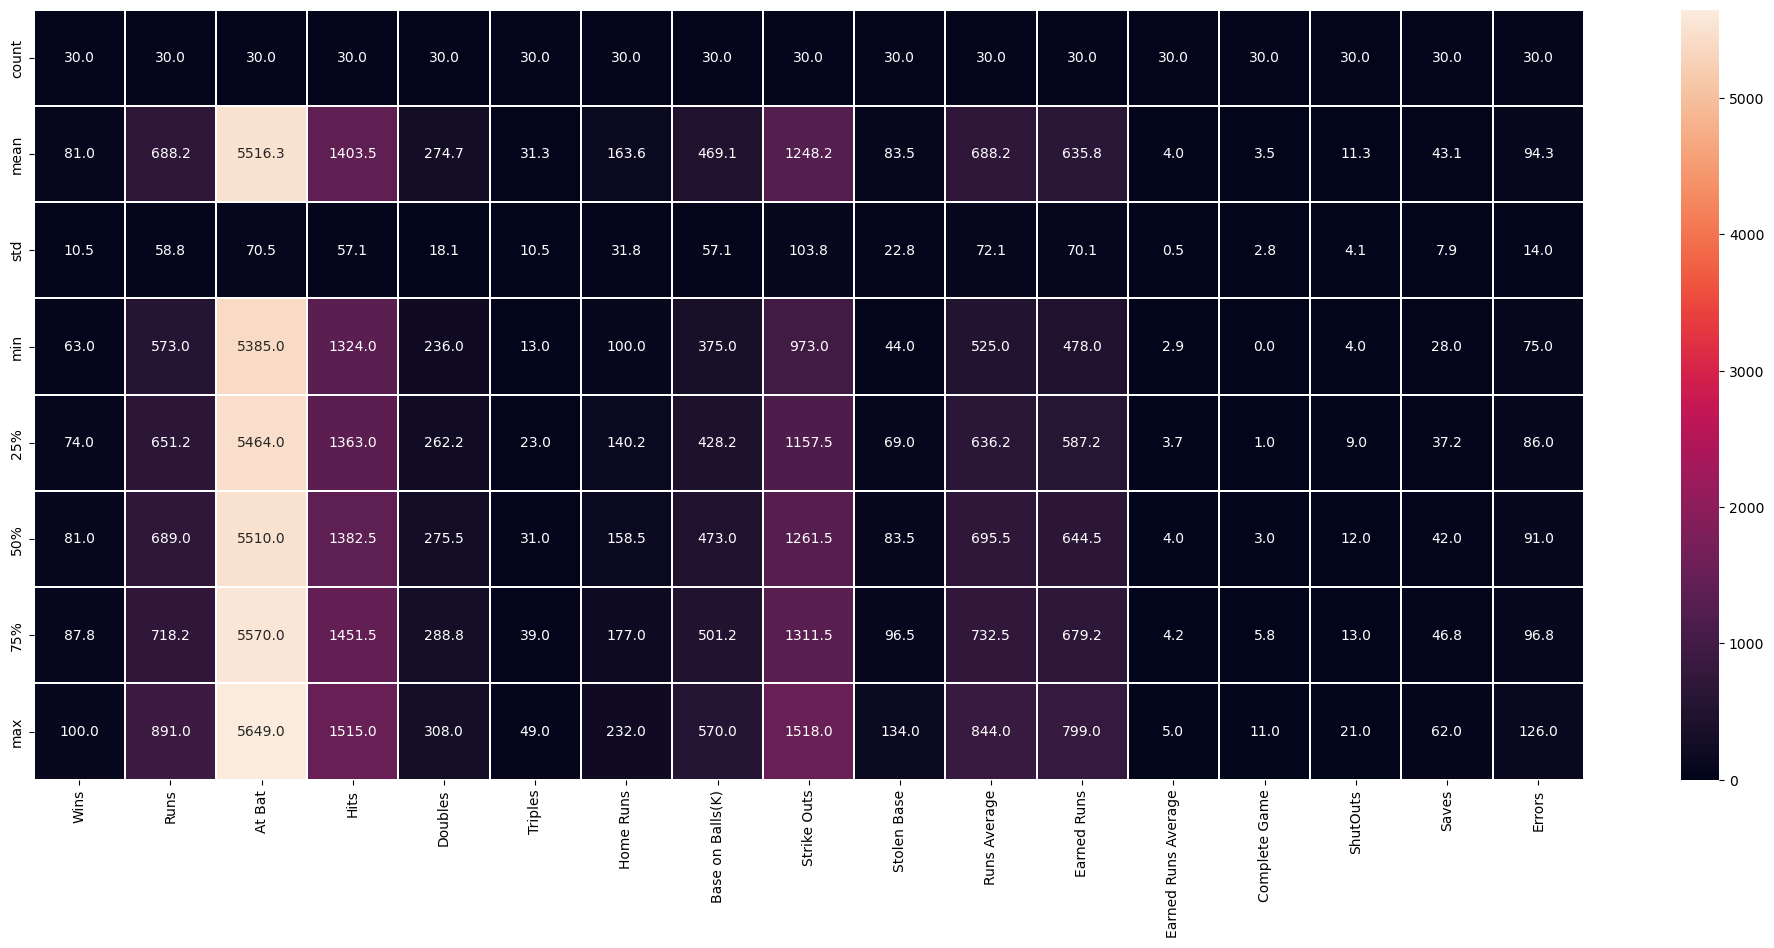

In [10]:
#Visualizing the dataset using Heatmap
plt.figure(figsize = (25,10))
sns.heatmap(bb_df.describe(), linewidths = 0.1, fmt = '0.1f',annot = True)

In [11]:
bb_df.describe()

Wins        Runs       At Bat         Hits     Doubles  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

         Triples   Home Runs  Base on Balls(K)  Strike Outs  Stolen Base  \
count  30.000000   30.000000         30.000000     30.00000    30.000000   
mean   31.300000  163.633333        469.100000   1248.20000    83.500000   
std    10.452355   31.823309         57.053725    103.75947    22.815225   
min    13.000000  100.000000        375.000000    973.00000    44.000000   
25%    23.000000  140.250000        428.250000   1157.50000    69.000000   
50%    31.000000  158.500000        473.000000   1261.50000    83.500000   
75%    39.000000  177.000000        501.250000   1311.50000    96.500000   
max    49.000000  232.000000        570.000000   1518.00000   134.000000   

       Runs Average  Earned Runs  Earned Runs Average  Complete Game  \
count     30.000000    30.000000            30.000000      30.000000   
mean     688.233333   635.833333             3.956333       3.466667   
std       72.108005    70.140786             0.454089       2.763473   
min      525.000000   478.000000             2.940000       0.000000   
25%      636.250000   587.250000             3.682500       1.000000   
50%      695.500000   644.500000             4.025000       3.000000   
75%      732.500000   679.250000             4.220000       5.750000   
max      844.000000   799.000000             5.040000      11.000000   

        ShutOuts      Saves      Errors  
count  30.000000  30.000000   30.000000  
mean   11.300000  43.066667   94.333333  
std     4.120177   7.869335   13.958889  
min     4.000000  28.000000   75.000000  
25%     9.000000  37.250000   86.000000  
50%    12.000000  42.000000   91.000000  
75%    13.000000  46.750000   96.750000  
max    21.000000  62.000000  126.000000

- If we look at the mean and 50% columns for different features we can see data is right skew for most of the features.
- Count is same for each variables
- 75% and max values for Errors, Shotout, Run Scored shows presence of possible outliners.
- Overall all statistical parameters from mean to max, indicate features are seems to be progressing in a definite manner showing  no visible abnormalities.
- Heatmap clearly shows data need to scale while building ML Model.

#### Checking NULL Values

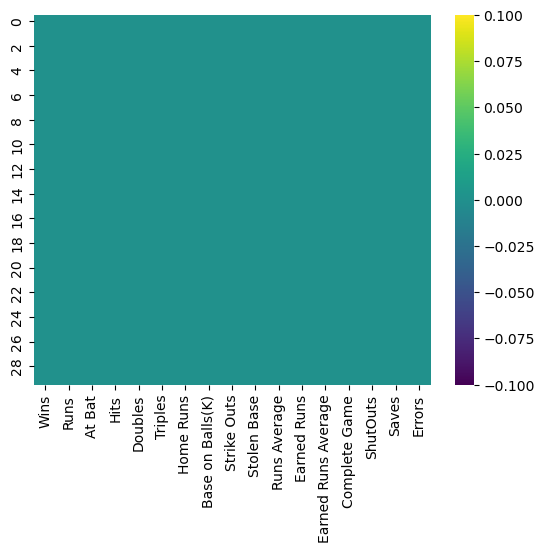

In [12]:
sns.heatmap(bb_df.isnull(),cmap='viridis')
plt.show()

In [14]:
bb_df.isnull().sum()

Wins                   0
Runs                   0
At Bat                 0
Hits                   0
Doubles                0
Triples                0
Home Runs              0
Base on Balls(K)       0
Strike Outs            0
Stolen Base            0
Runs Average           0
Earned Runs            0
Earned Runs Average    0
Complete Game          0
ShutOuts               0
Saves                  0
Errors                 0
dtype: int64

In [13]:
bb_df.isnull().sum().sum()

0

There is no NULL values in the dataset.

### Distribution of Features

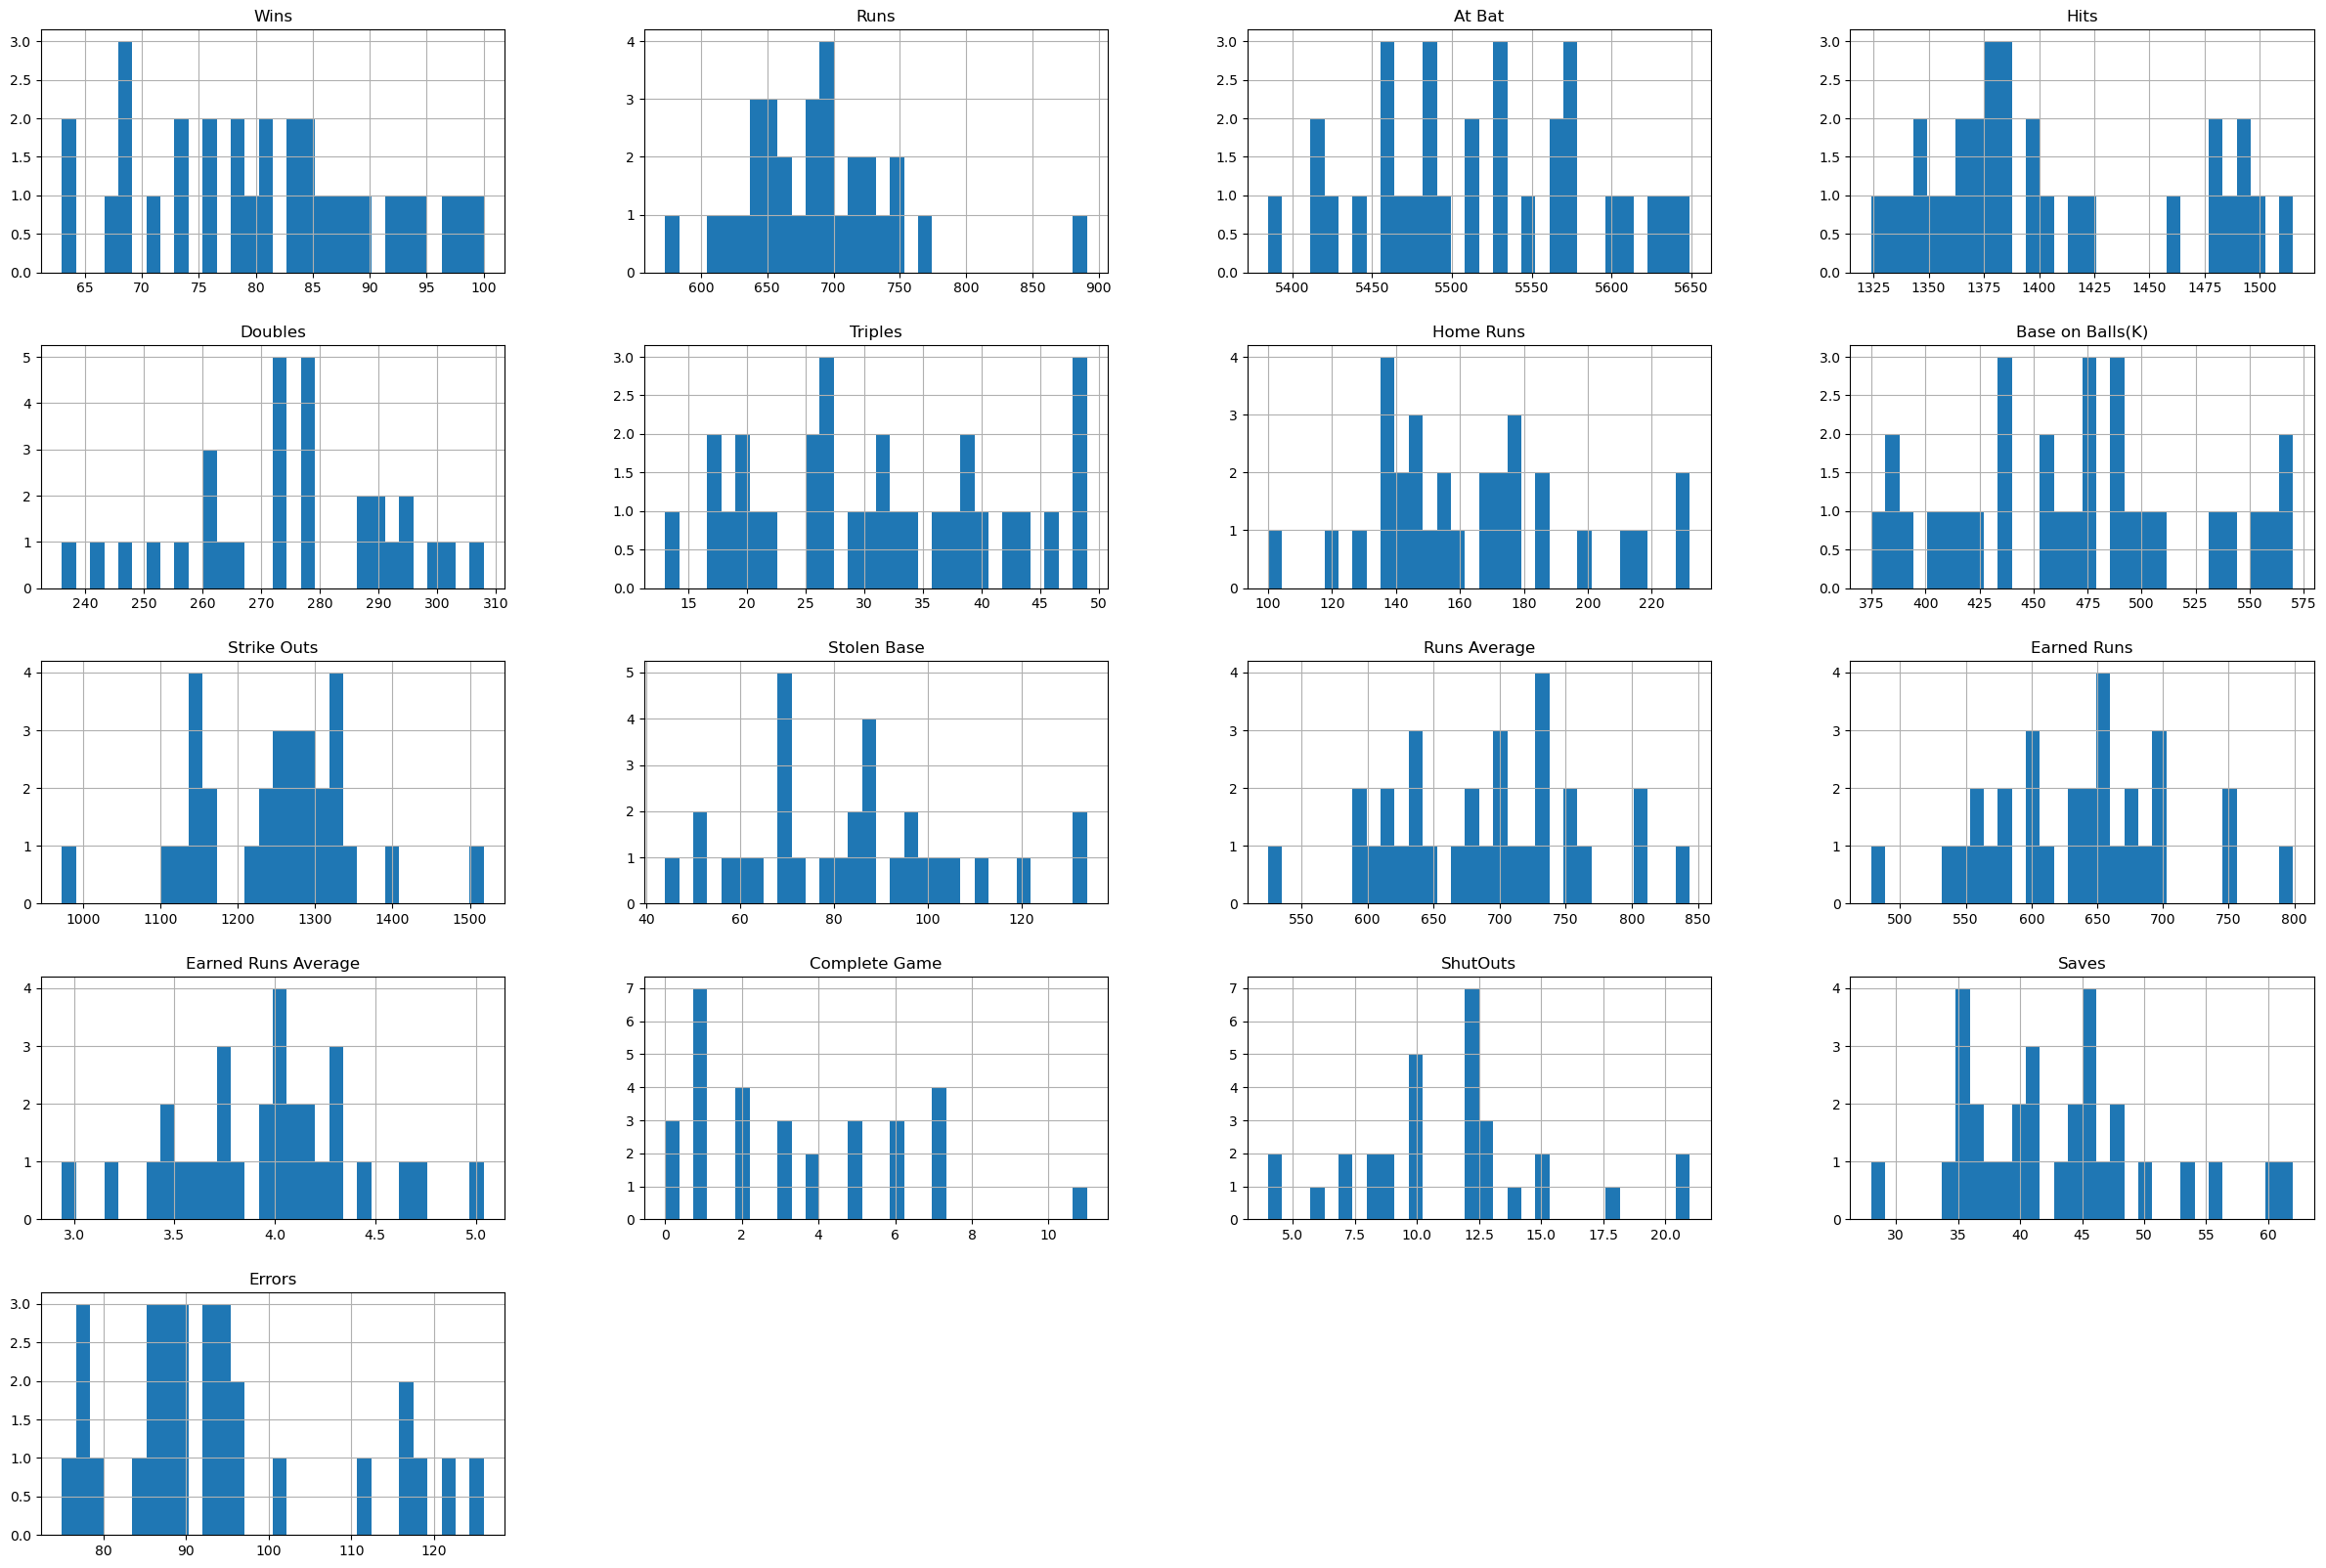

In [14]:
bb_df.hist(bins = 30,figsize=(30,20))
plt.show()

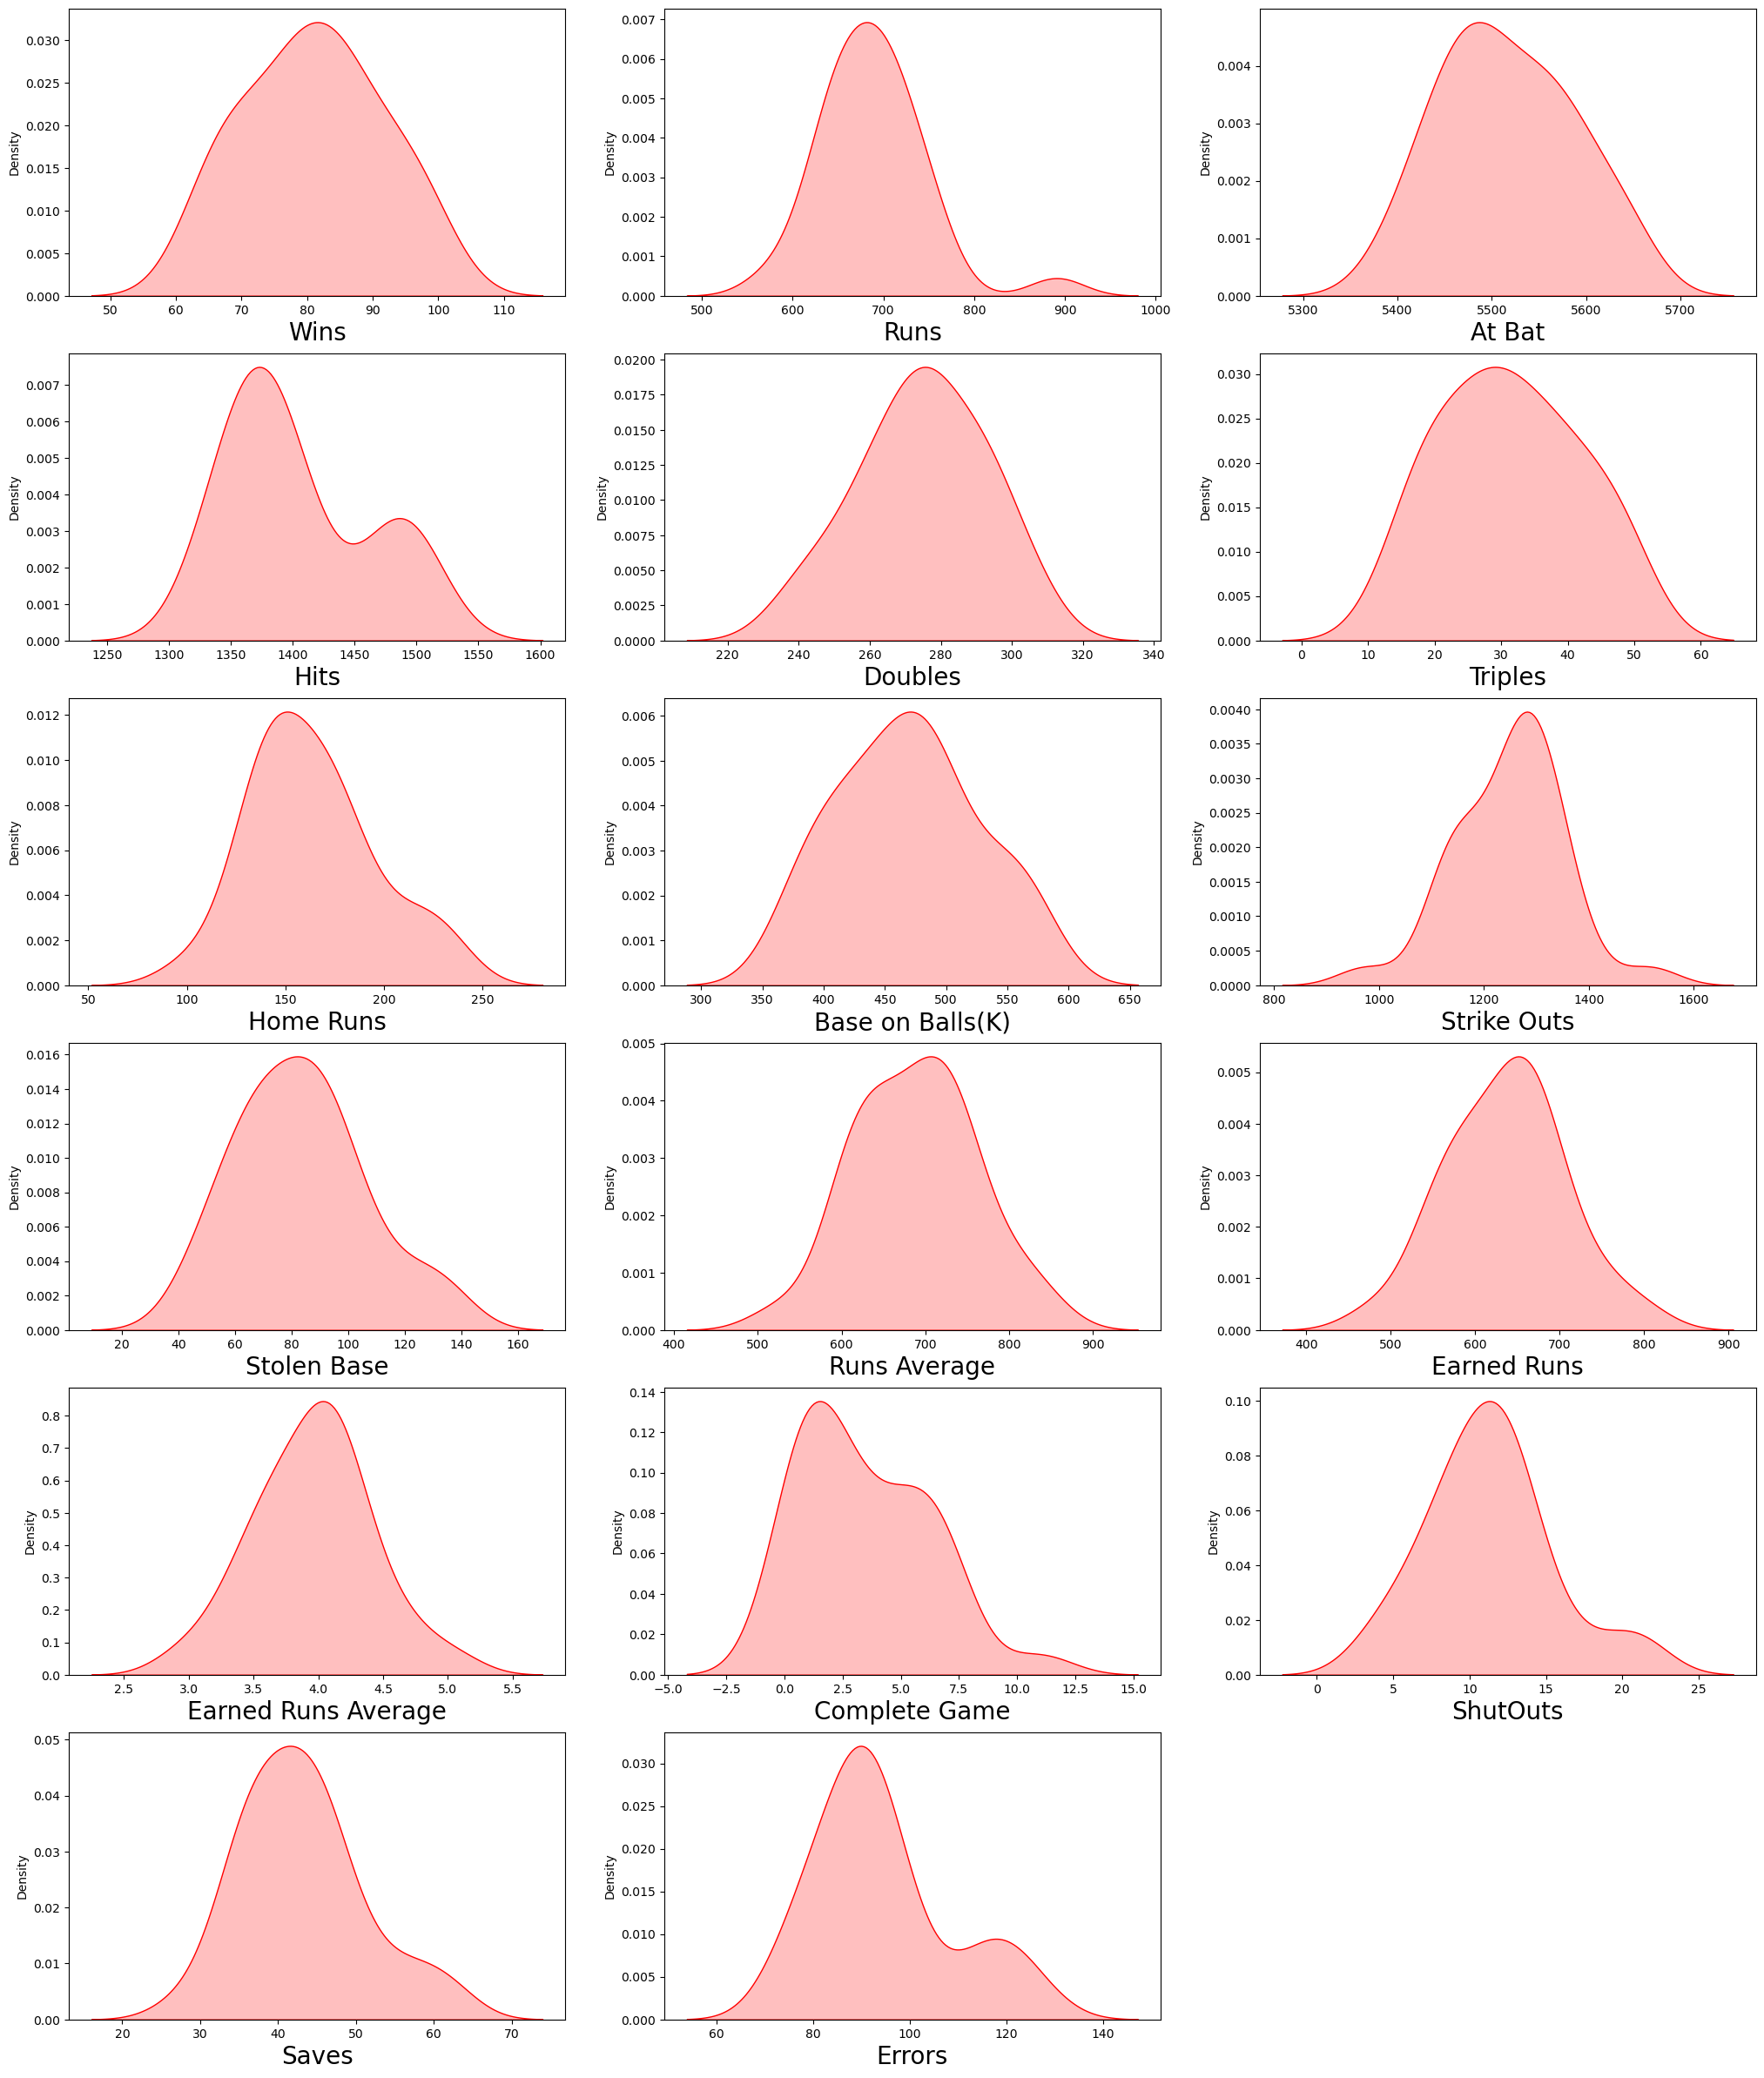

In [15]:
plt.figure(figsize = (25,30), facecolor = 'white')
plotnumber = 1
for column in bb_df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(bb_df[column], color = 'r', hist=False, kde_kws = {'shade':True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

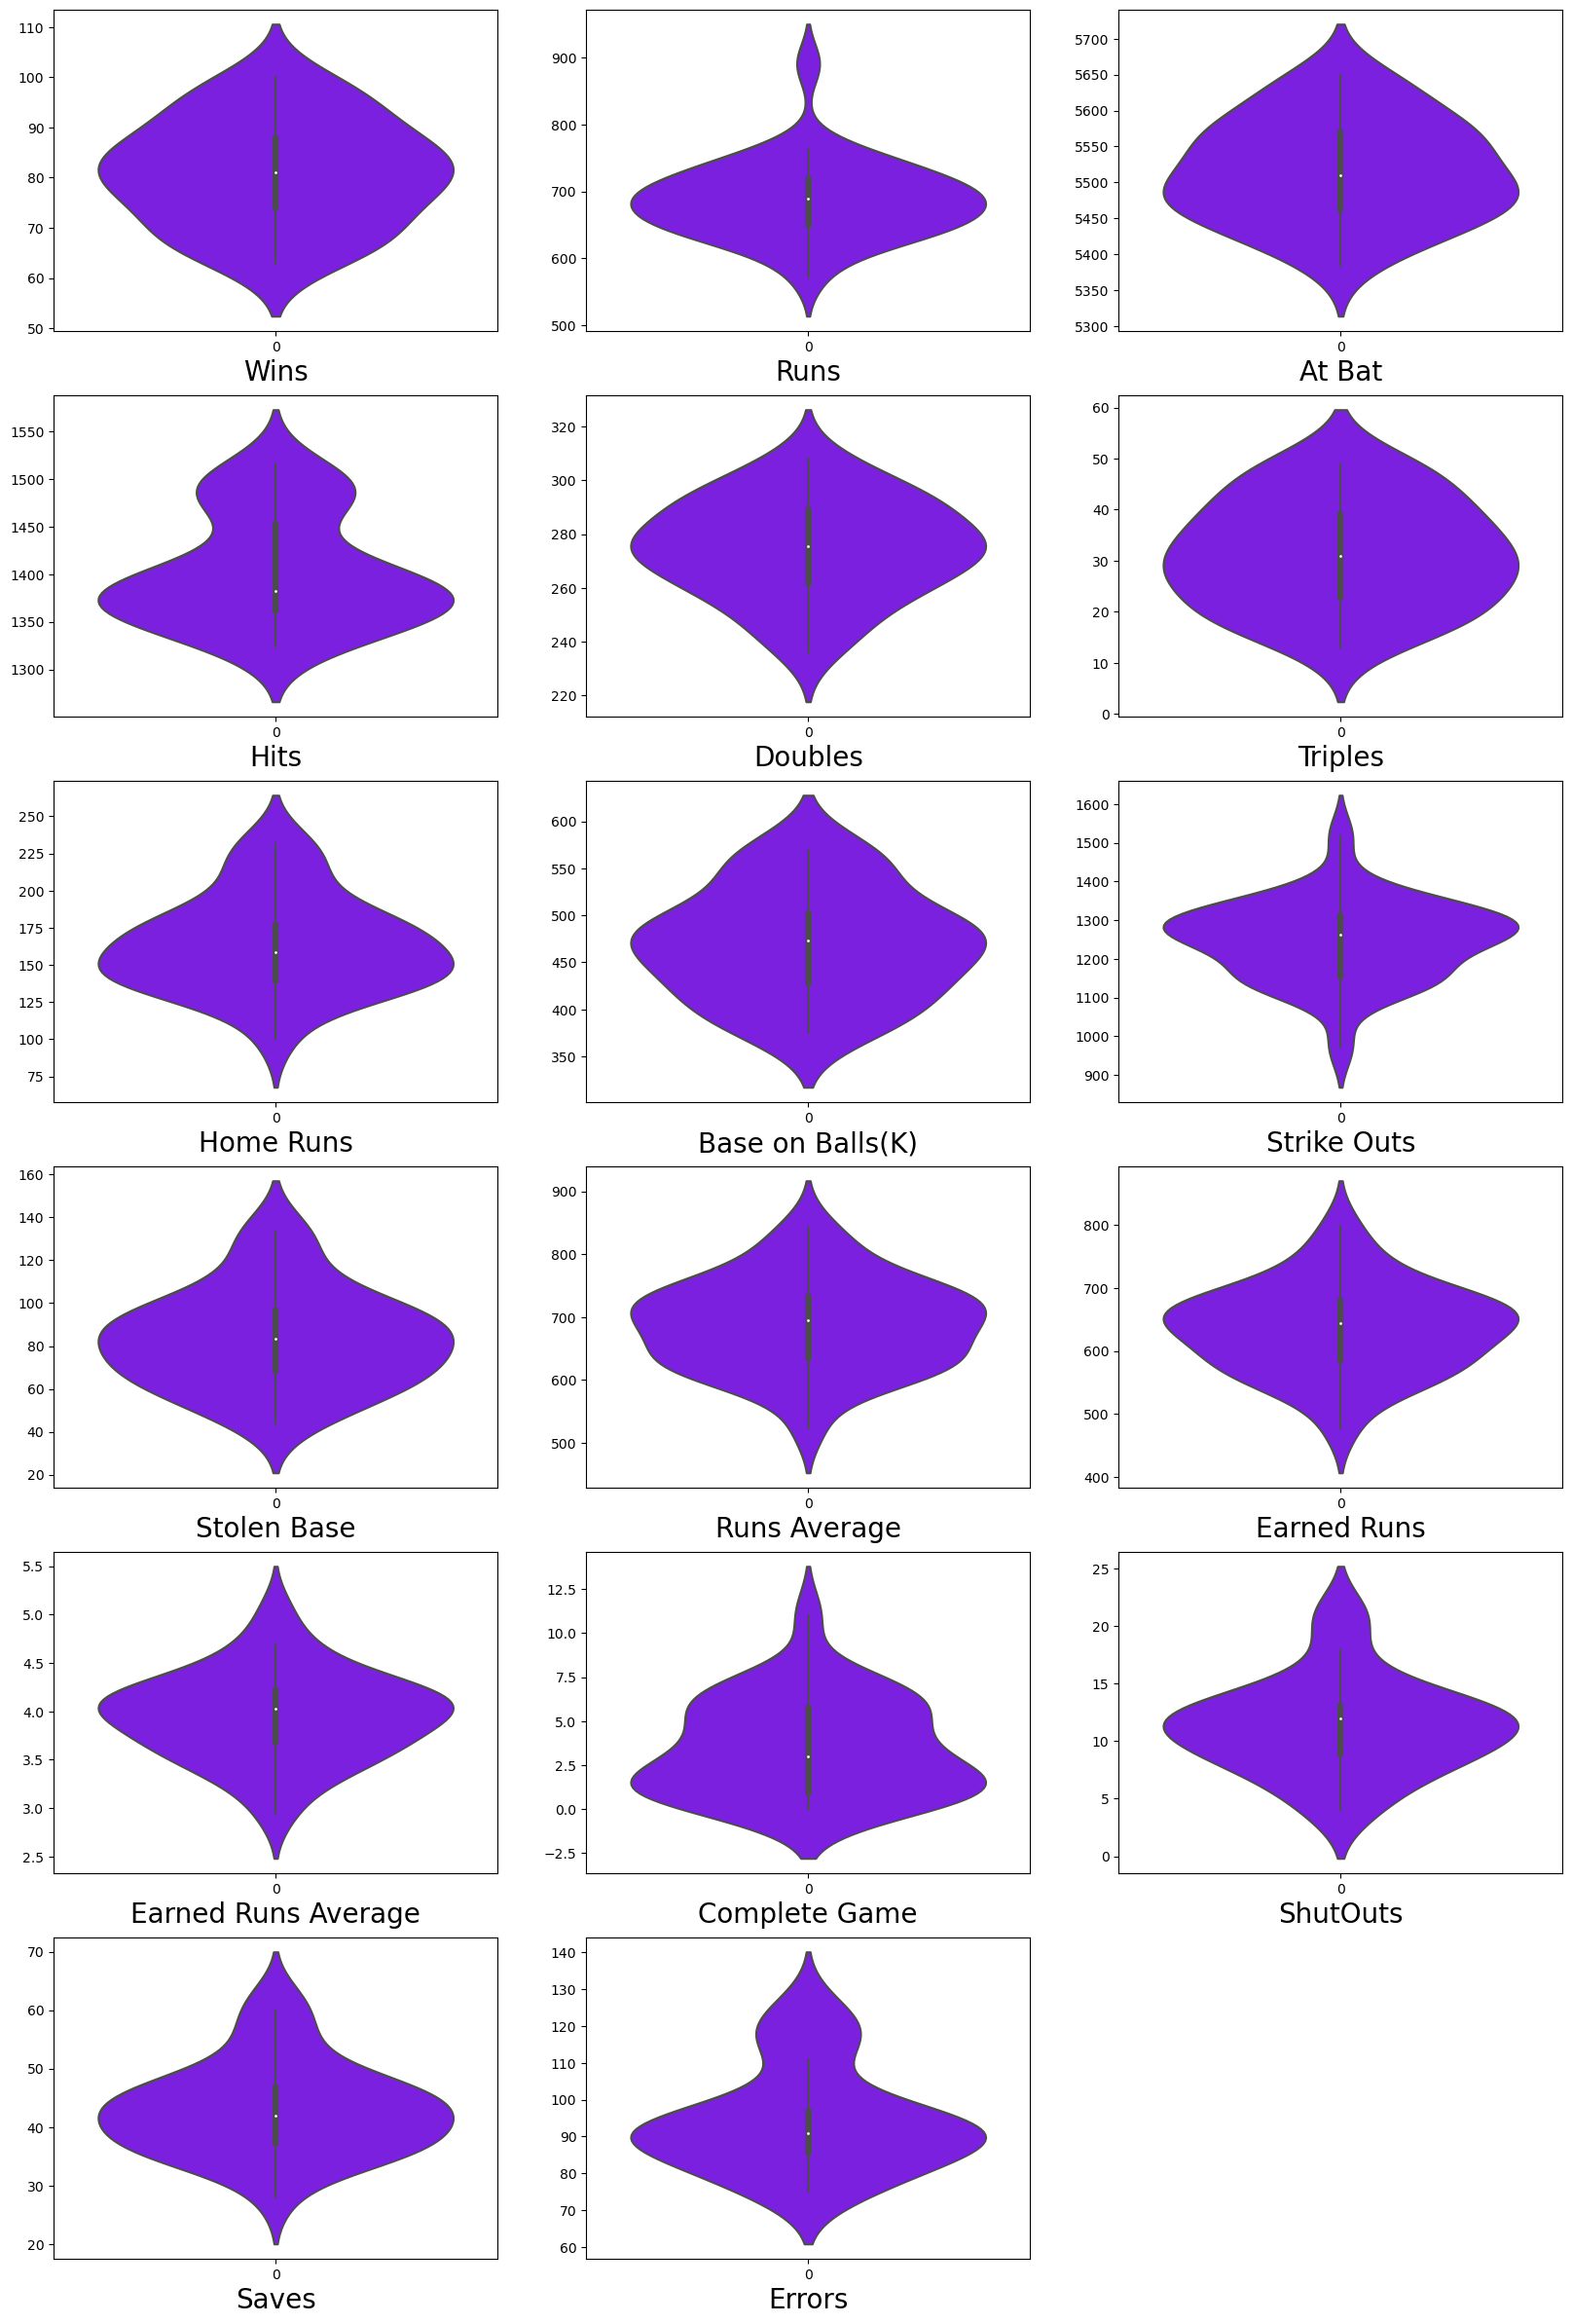

In [16]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber =1
for column in bb_df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(bb_df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()


- Shut outs and Complete Game occur very rarely now-a-days which we can  definately see in violniplot of these variables
- An Errors does not count as a hit but still counts as an at bat for the batter, So need to dive into how much Error are     contributing to at bat.
- Run average, Earned run and Earned run average are important for pitcher statstics. We can see there is not much           difference in plot of Earned run and Run Average, so from here we can conclude that Unearned Run doesnot making much       difference in wins.
- Homeruns (125 to 175 peak) are more than triples (20 to 40 majority) so most of good shot by battar directly convert into   homeruns.
- Let consider violinplot of doubles and base on balls. We know that if pitcher pitched ball for consecutive 4 ball then     Base is awarded to batter. Clearly More runs comes from base of ball than doubles.

###### Lets get clearity on how team wins and also some clearity over Runs Vs Hits

- How do you win baseball?
  
  - To win in baseball, you must reach the end of the game with more runs than your opponent. If there is a TIE, than you       will go for another inning until one team has more runs at the end of the inning.

- Runs Vs Hits
  - Runs(R) - The number of runs scored by that player, by reaching home base in any manner.
  - Hits(H) - The number of base hits made by that player, not including reaching base on an error or on a 'fielder's                     choice'

###### Now we will see, how many hits convert into Runs and inturn lead to win through multivariate analysis

Text(0, 0.5, 'Hits')

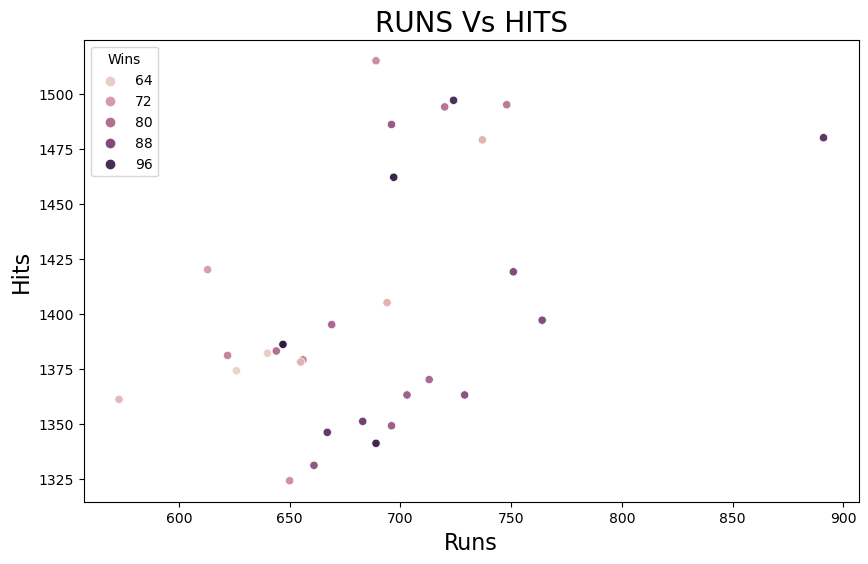

In [17]:
# Checking relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('RUNS Vs HITS', fontsize = 20)
sns.scatterplot(data = bb_df,x ='Runs',y = 'Hits',hue='Wins')
plt.xlabel('Runs', fontsize = 16)
plt.ylabel('Hits', fontsize = 16)

- Enven if number of times ball hit bat is less than 1375 still run in range  of 650 to 750 contribute to win.
- Very less wining chance for run less than 650 and number of hits less than 1325.
- There is one outlier in runs. After checking skewness we can decide whether to keep to while building Machine Learning model or remove it even if it is valid data point. Definately it will affect performance of ML model if  we consider outlier data points as most of data point will not fall in that side.

Text(0, 0.5, 'Home Runs')

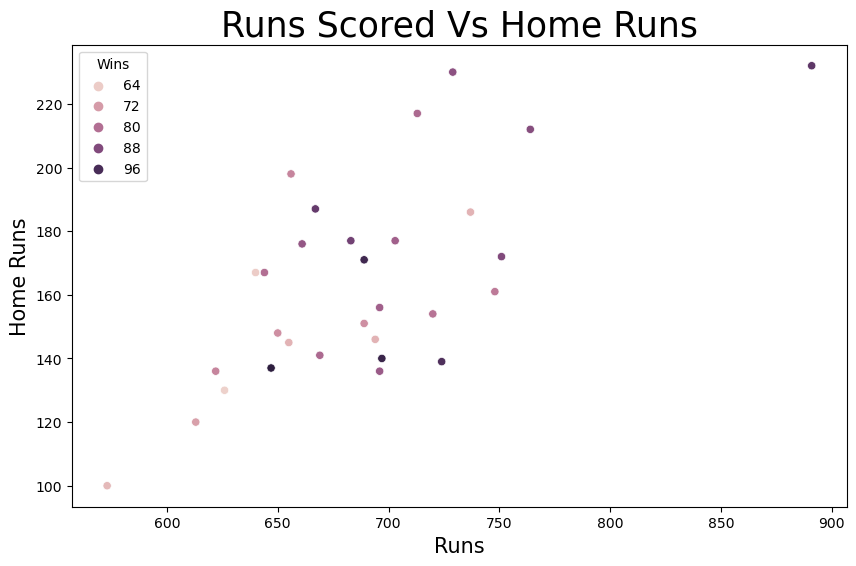

In [18]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs', fontsize = 25)
sns.scatterplot(data = bb_df,x ='Runs',y = 'Home Runs',hue='Wins')
plt.xlabel('Runs', fontsize = 15)
plt.ylabel('Home Runs', fontsize = 15)

- Home Runs in a range of 140 & 180 with combination of Runs scored between 650-750 lead to more than 90 Wins for team. So   keeping home runs in this range is crucial for more possibility of wins.

Text(0, 0.5, 'At Bat')

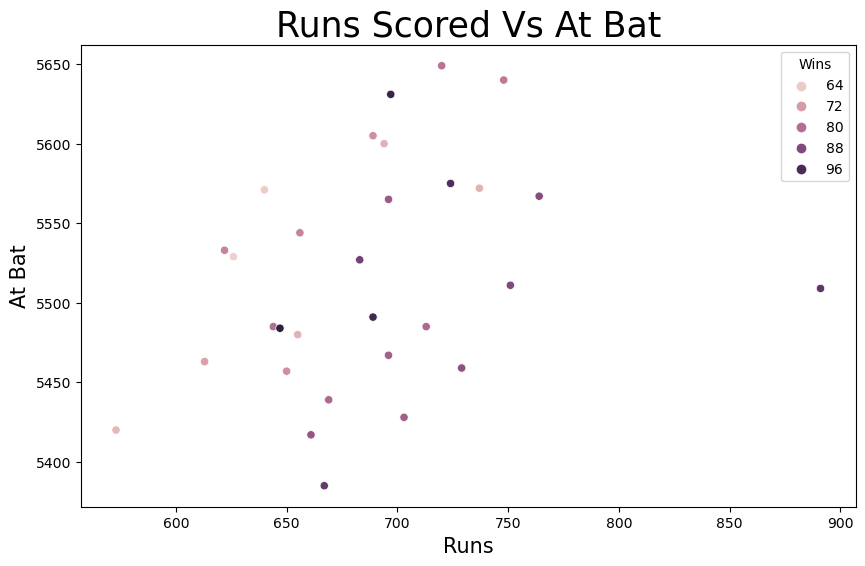

In [24]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs At Bat', fontsize = 25)
sns.scatterplot(data = bb_df,x ='Runs',y = 'At Bat',hue='Wins')
plt.xlabel('Runs', fontsize = 15)
plt.ylabel('At Bat', fontsize = 15)

- We doesnot get any benchmark range for at bats from here. So it is questionable things that how much At bats matter to     winning statstics. Atleast we get here that At Bat and Run Scored has positive linear relationship, which means that more   Run Scroed naturally lead to more at bats.

Text(0, 0.5, 'Strike Outs')

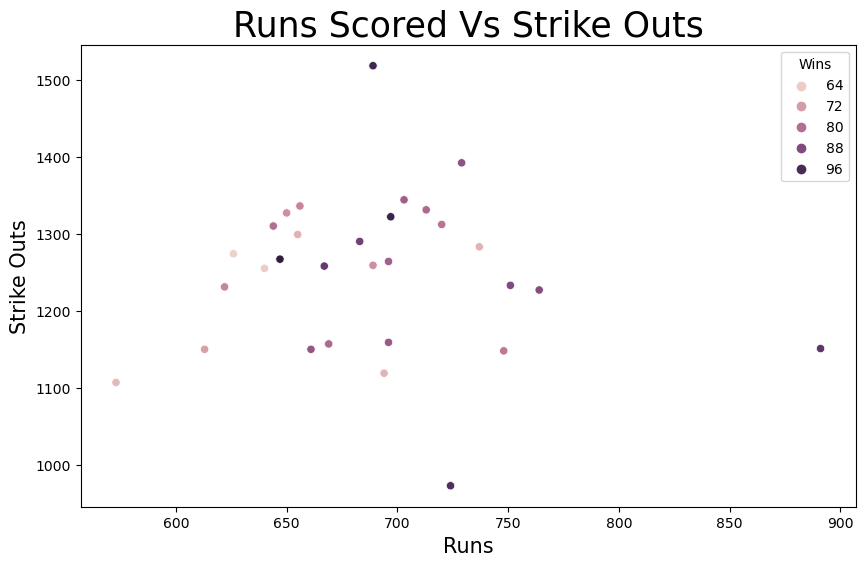

In [19]:
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs', fontsize = 25)
sns.scatterplot(data = bb_df,x ='Runs',y = 'Strike Outs',hue='Wins')
plt.xlabel('Runs', fontsize = 15)
plt.ylabel('Strike Outs', fontsize = 15)

- Strike Outs means batter is out.
- Strike out below 1200 is like making recipe for losing game. Strikeouts in regular interval not only lead to pressure on opponent in game but also bring break on high run score.

Text(0, 0.5, 'Earned Runs Average')

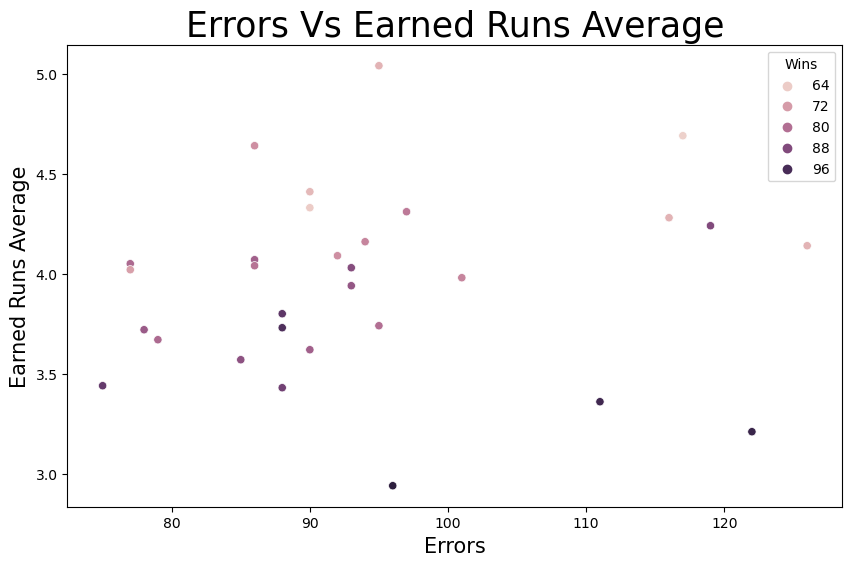

In [20]:
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Runs Average', fontsize = 25)
sns.scatterplot(data = bb_df,x ='Errors',y = 'Earned Runs Average',hue='Wins')
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Earned Runs Average', fontsize = 15)

- Same results as we got in Violin Plot
- Keeping ERA below 3.5 or as much as low by Pitcher means sure win. By keeping low ERA pitcher saves run for his team.
- Another things we can see in above scatter plot is that Minimum error means maximum wins. Keeping Errors below number 90   can be held as benchmark.

In [21]:
bb_df.columns

Index(['Wins', 'Runs', 'At Bat', 'Hits', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls(K)', 'Strike Outs', 'Stolen Base', 'Runs Average',
       'Earned Runs', 'Earned Runs Average', 'Complete Game', 'ShutOuts',
       'Saves', 'Errors'],
      dtype='object')

Text(0, 0.5, 'Base on Balls(K)')

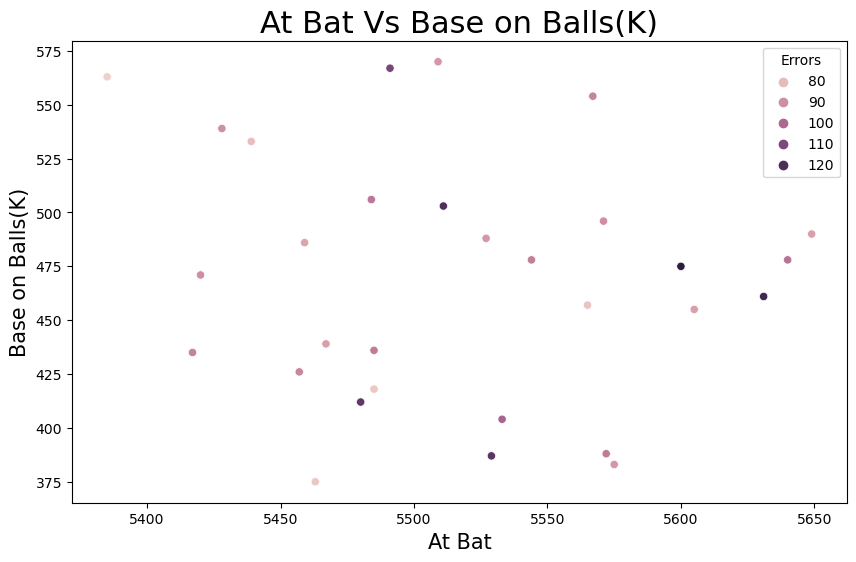

In [22]:
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls(K)', fontsize = 22)
sns.scatterplot(data = bb_df,x ='At Bat',y = 'Base on Balls(K)',hue='Errors',cmap=('Spectral'))
plt.xlabel('At Bat', fontsize = 15)
plt.ylabel('Base on Balls(K)', fontsize = 15)

- At Bat Vs Base on Balls(K) doesn't give any significant information than High ERA means High Errors.

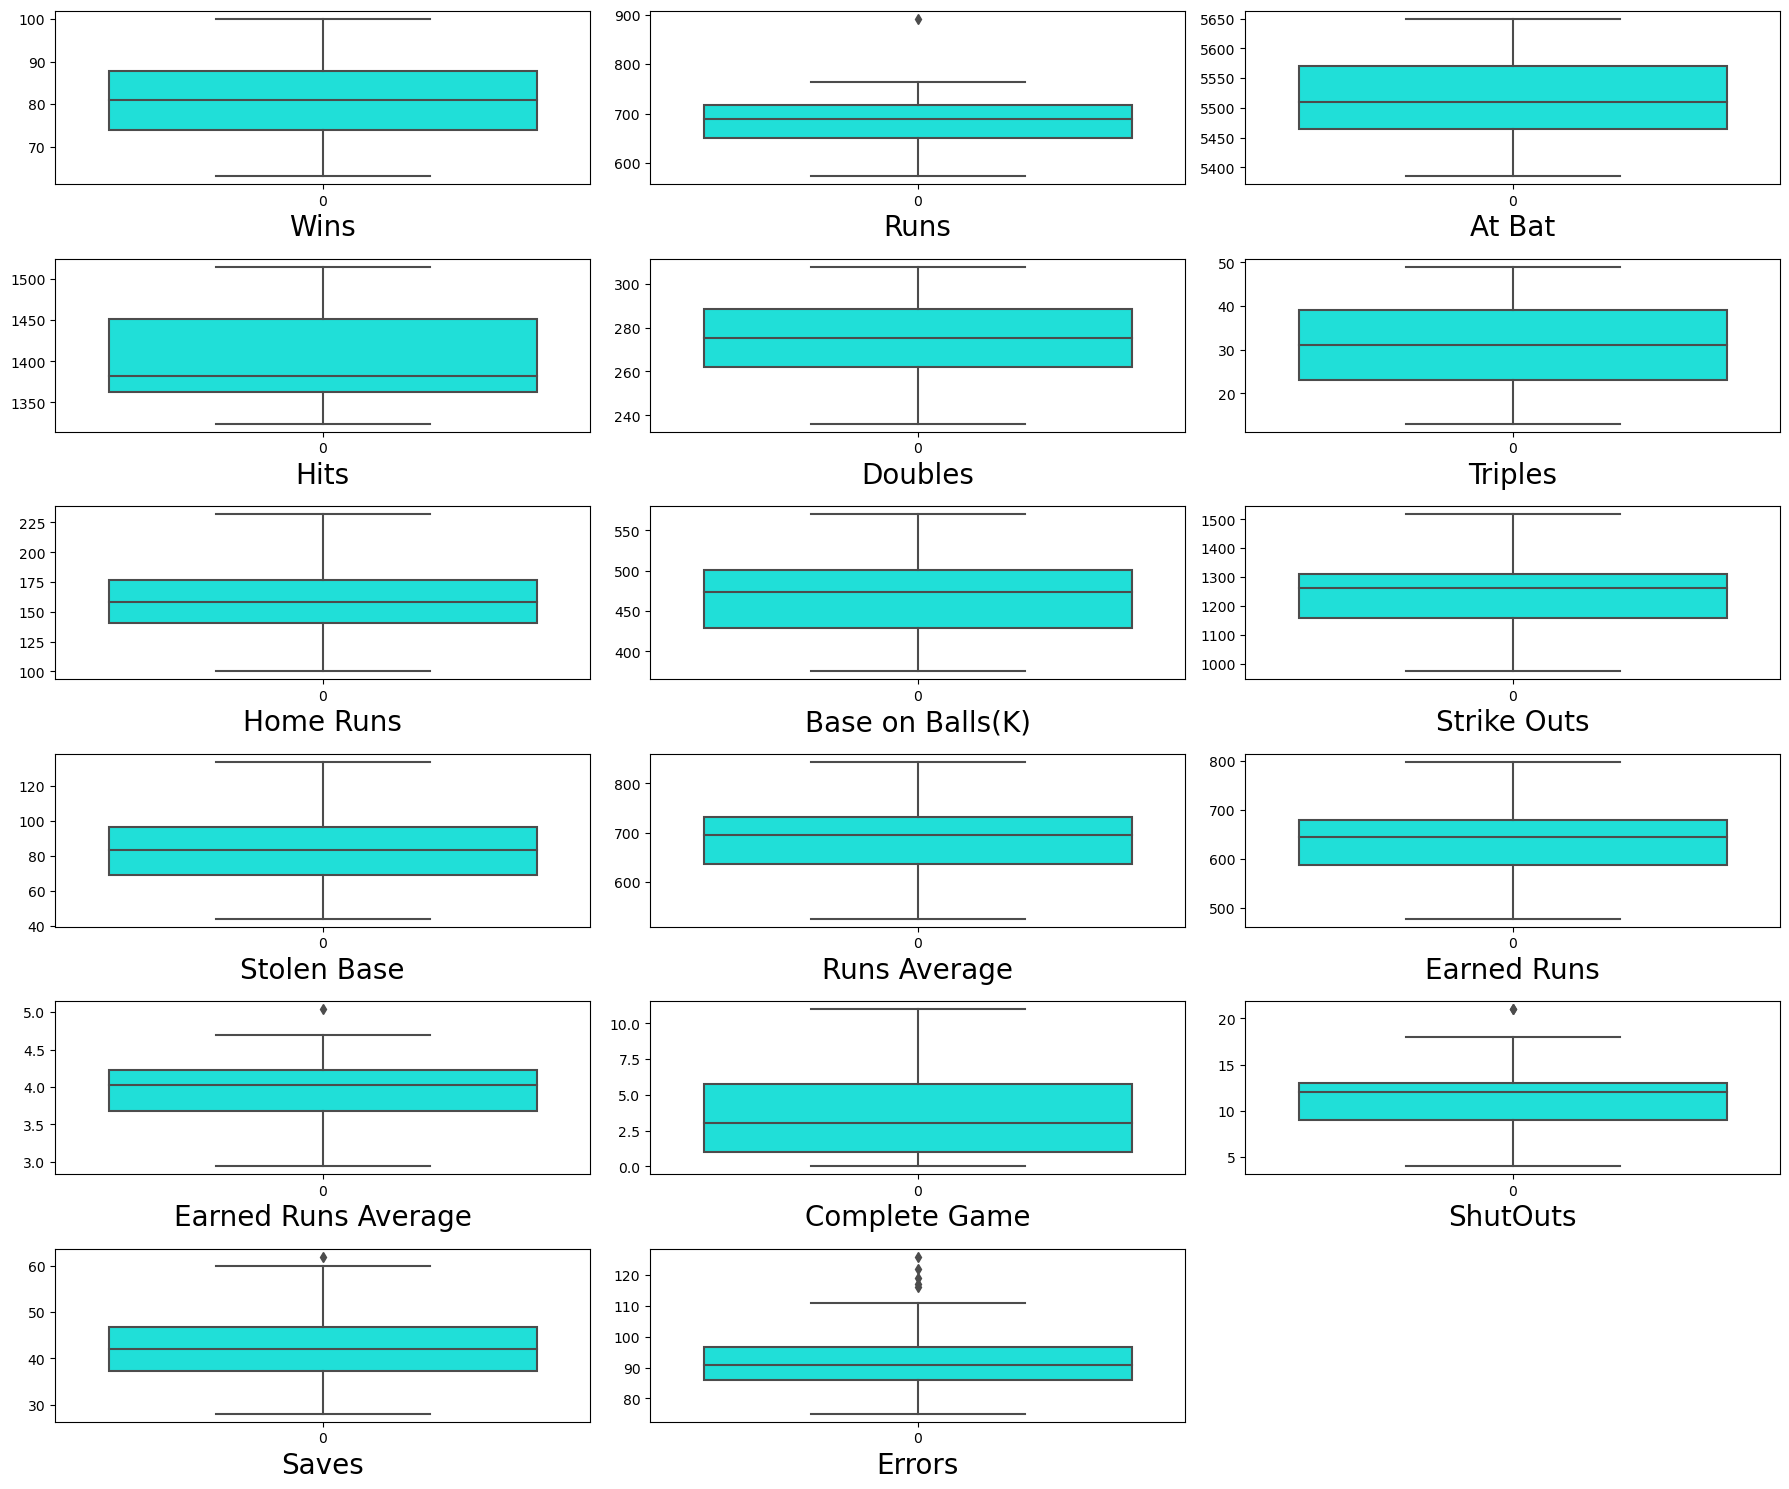

In [23]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in bb_df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(bb_df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- Shoutouts are rare but completely possible with exceptional performance.
- Runs has one outlier but Run is one of the most important parameter, it will be wise to remove corresponding datapoint.
- Outliers in Errors are totally possible so now need to worry about it.

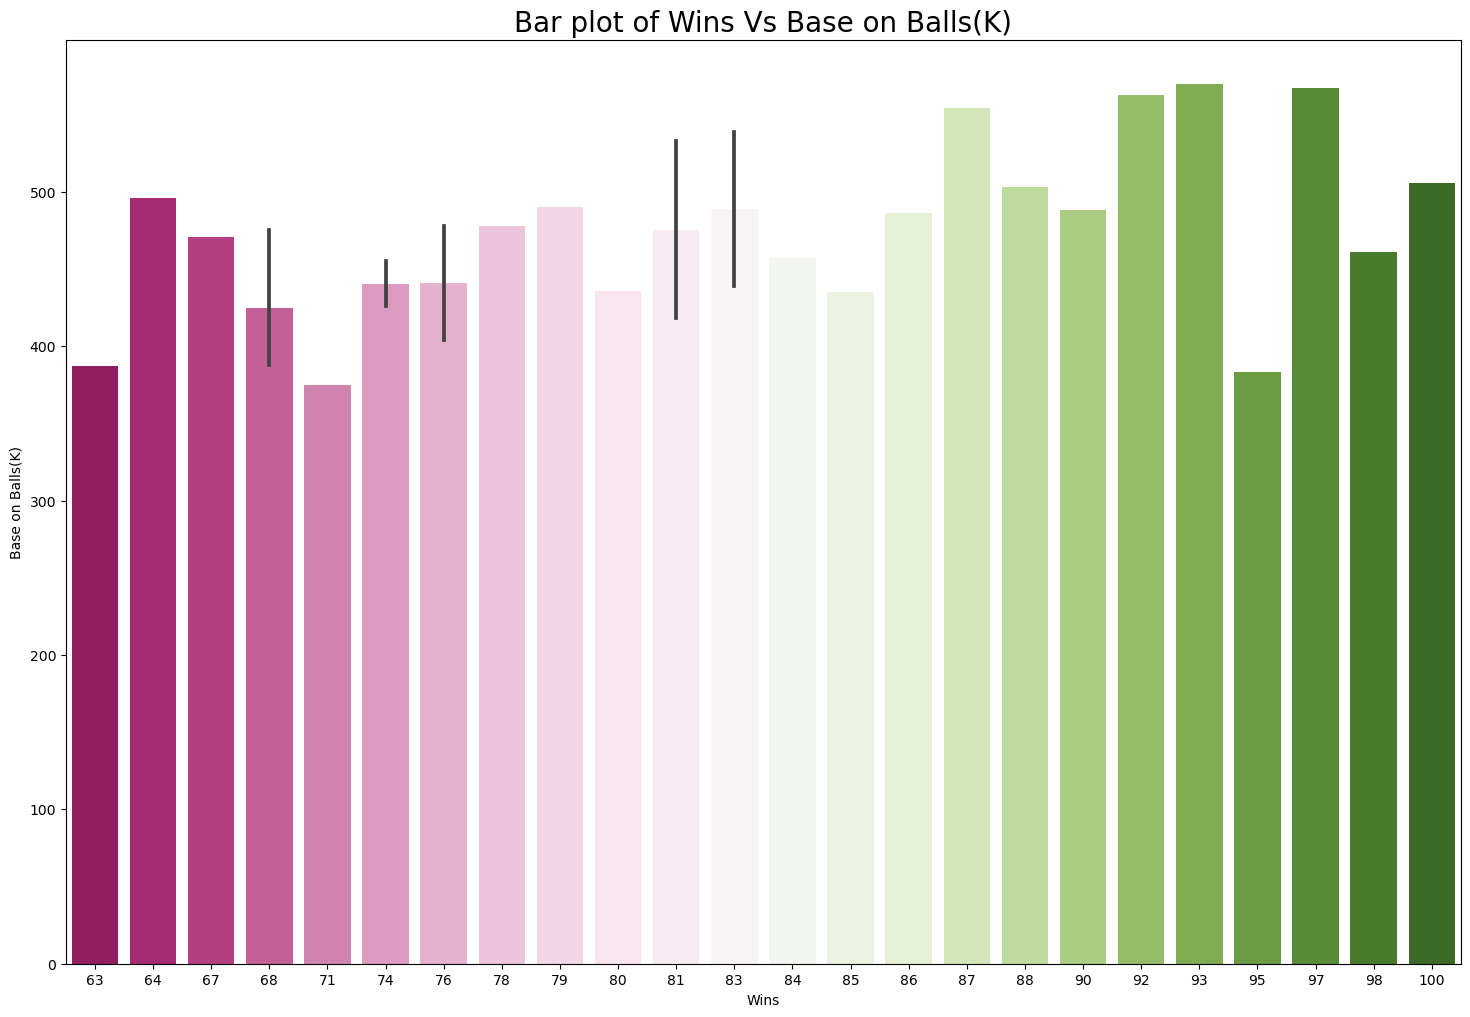

In [24]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y='Base on Balls(K)',data = bb_df, palette = 'PiYG')
plt.title('Bar plot of Wins Vs Base on Balls(K)', fontsize = 20)
plt.show()

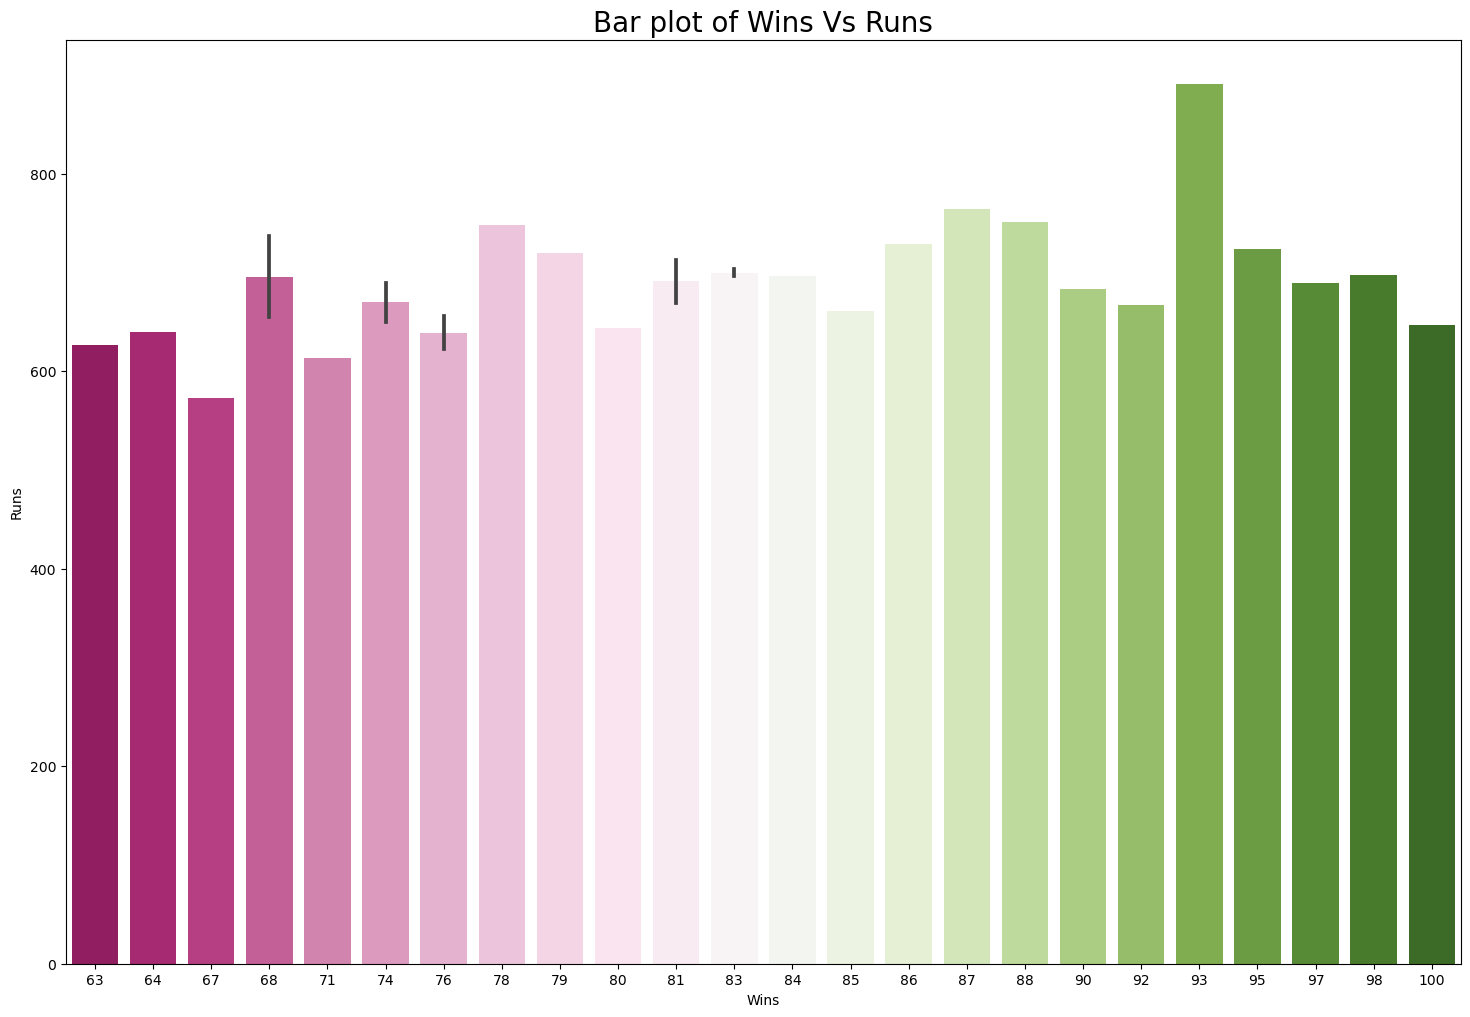

In [25]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y='Runs',data = bb_df, palette = 'PiYG')
plt.title('Bar plot of Wins Vs Runs', fontsize = 20)
plt.show()

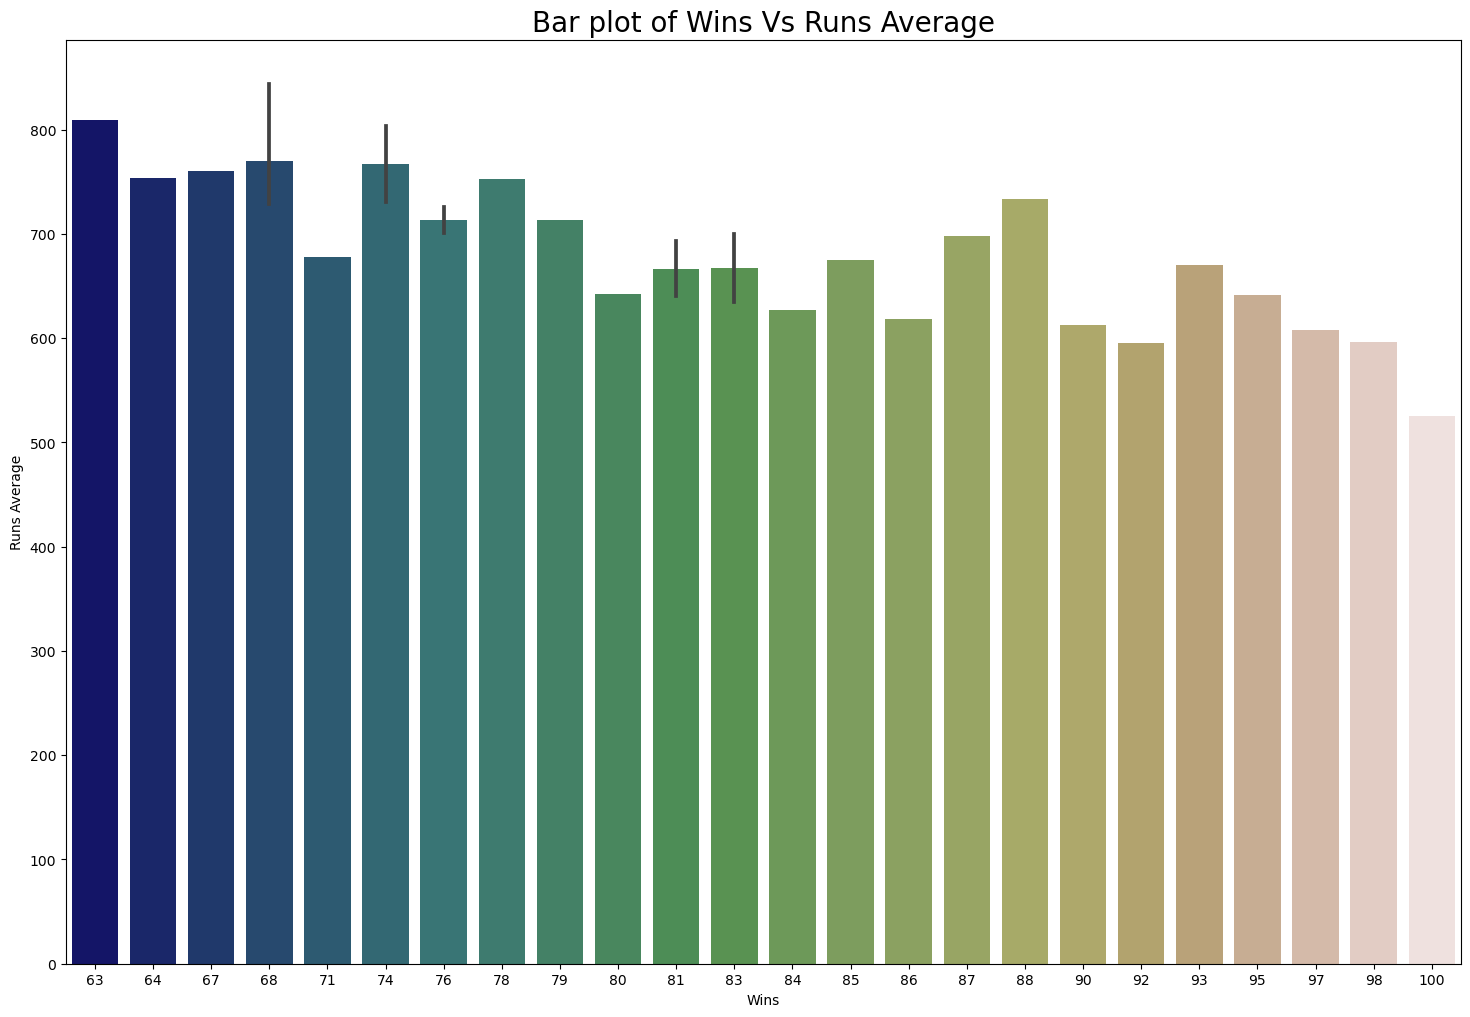

In [27]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y='Runs Average',data = bb_df, palette = 'gist_earth')
plt.title('Bar plot of Wins Vs Runs Average', fontsize = 20)
plt.show()

- Here comes interesting plot, we can see Run Average decrease with increase in number of wins. But why this trend if more runs means directly increase in chance of winning.
- More Run Average gives advantage to hitter and here as wins are high even at low run this clearly means that perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score. This must be reflected in any pitcher side stastical parameter like Strike outs, Earned Run or Earned Run Average.

###### Lets observe the relation of Wins with parameteres like ERA, Strikeouts.

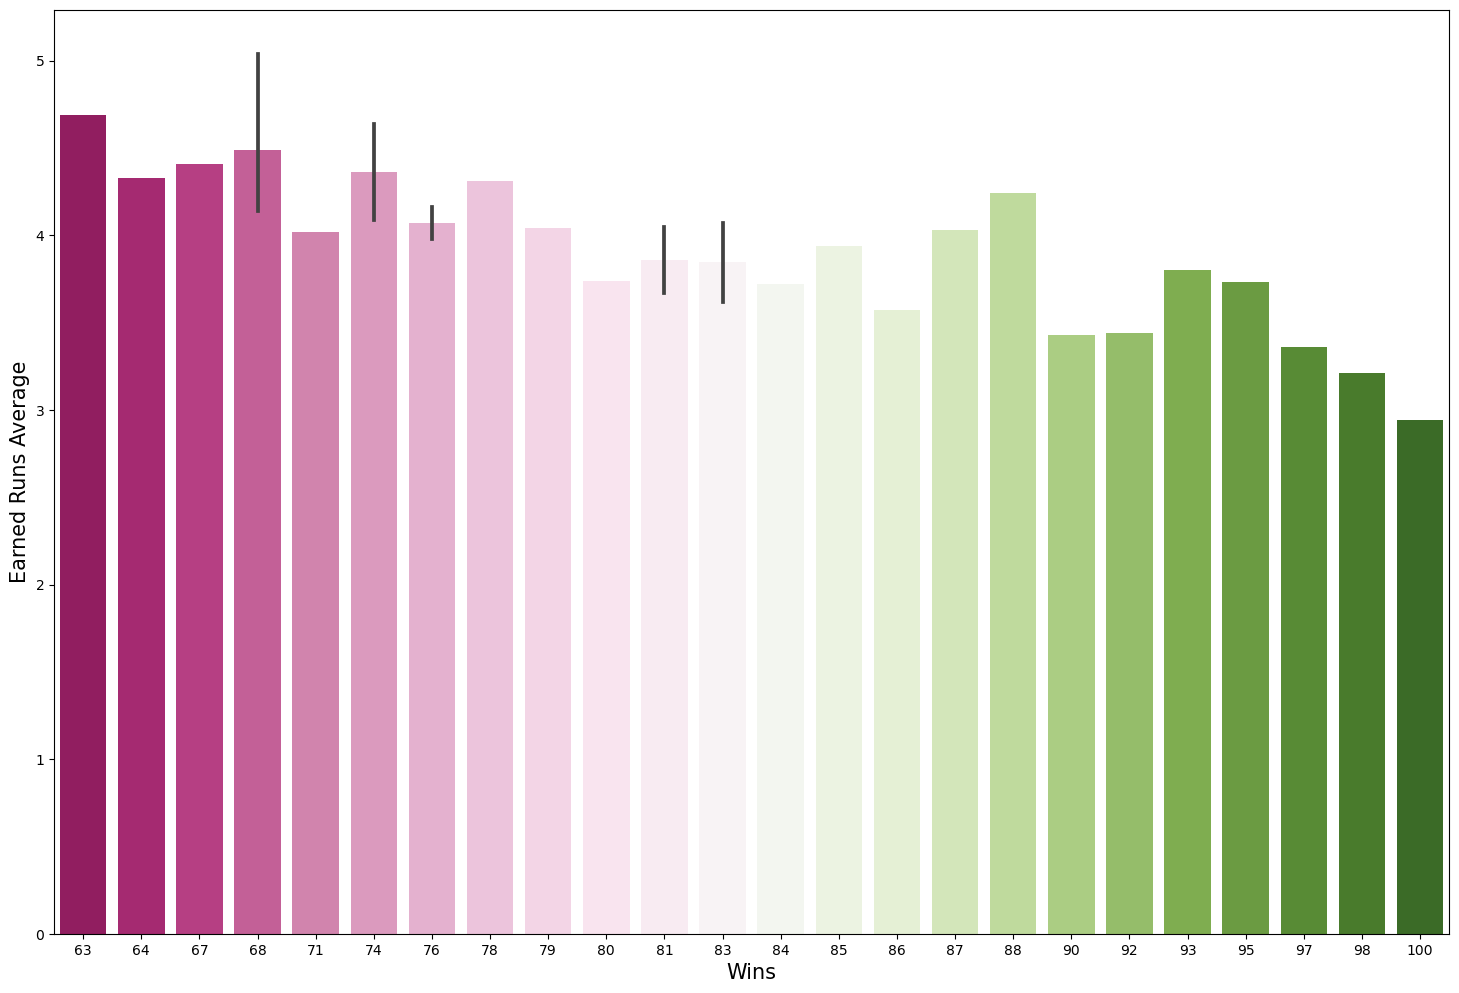

In [28]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins',y = 'Earned Runs Average',data = bb_df, palette='PiYG')
plt.xlabel('Wins', fontsize = 15)
plt.ylabel('Earned Runs Average', fontsize = 15)
plt.show()

- ERA is low for maximum wins.Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to score run.
- ERA and Runs Average score are bound to related with each other in linear relationship.
- Earned Run and Wins must have negative relationship. We will check it in further investigation.

###### Comparision through Strip Plot between Runs Average and Earned Runs Average

<Axes: title={'center': 'Runs Average Vs Earned Runs Average'}, xlabel='Runs Average', ylabel='Earned Runs Average'>

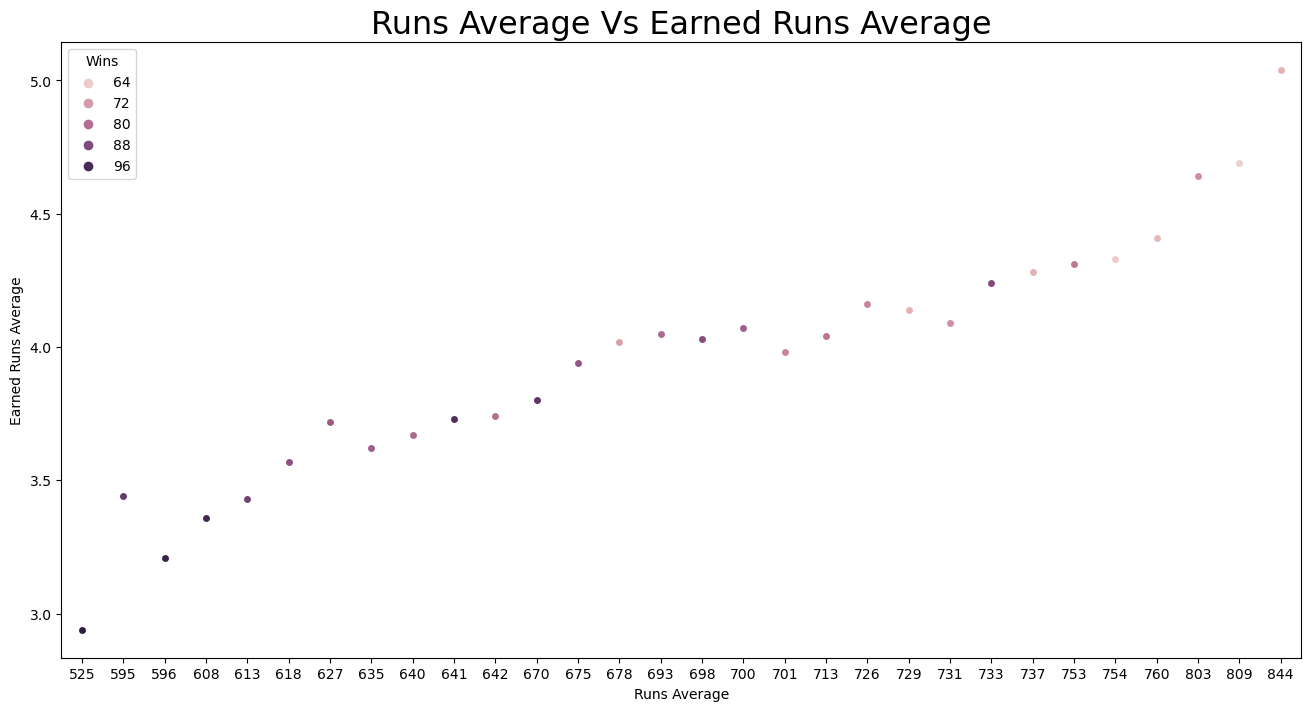

In [29]:
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Runs Average Vs Earned Runs Average', fontsize = 23)
sns.stripplot(data = bb_df,x ='Runs Average',y = 'Earned Runs Average',hue='Wins')

<Axes: title={'center': 'Runs Average Vs Strike Outs'}, xlabel='Runs Average', ylabel='Strike Outs'>

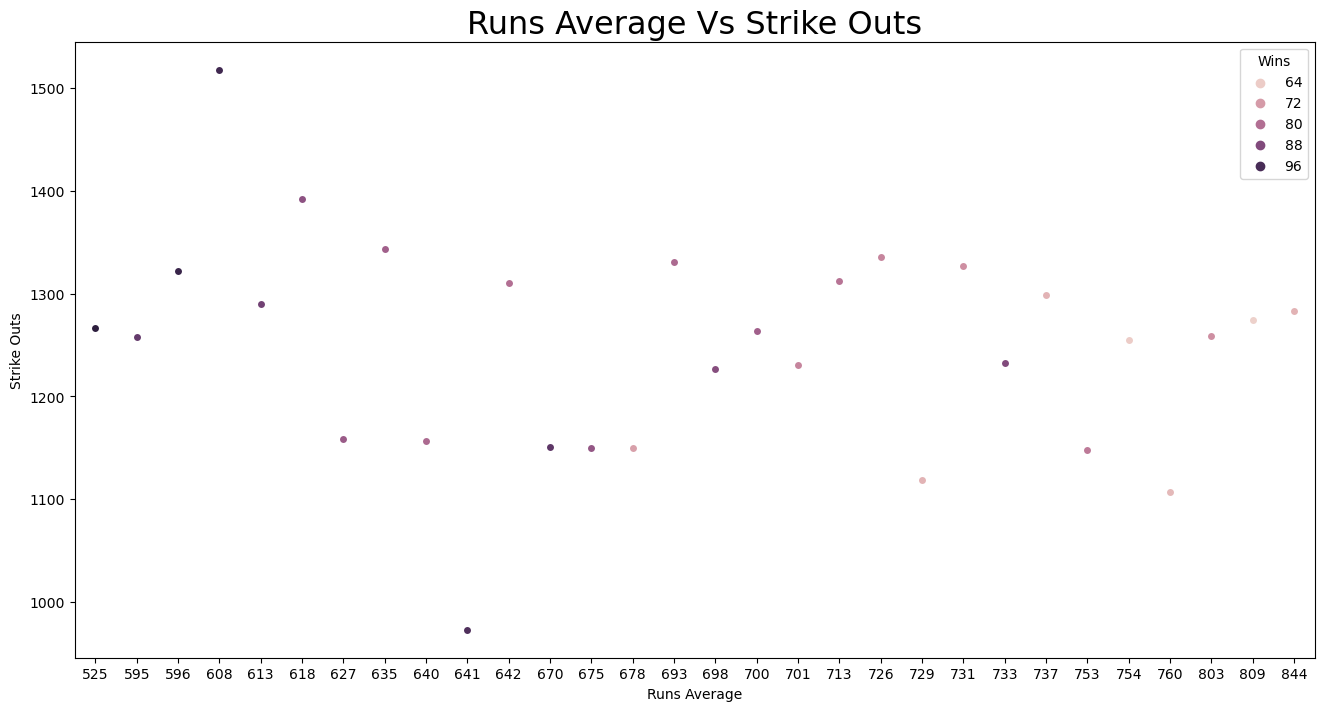

In [30]:
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Runs Average Vs Strike Outs', fontsize = 23)
sns.stripplot(data = bb_df,x ='Runs Average',y = 'Strike Outs',hue='Wins')

In [31]:
bb_df['Runs'].max()

891

In [32]:
bb_df.loc[bb_df['Runs']==891]

Wins  Runs  At Bat  Hits  Doubles  Triples  Home Runs  Base on Balls(K)  \
5    93   891    5509  1480      308       17        232               570   

   Strike Outs  Stolen Base  Runs Average  Earned Runs  Earned Runs Average  \
5         1151           88           670          609                  3.8   

   Complete Game  ShutOuts  Saves  Errors  
5              7        10     34      88

- Highest Doubles, Homeruns and base ball also belong tot his entry. We can confirm the same after cross checking the same.

In [33]:
bb_df['Home Runs'].max(),bb_df['Base on Balls(K)'].max(),bb_df['Doubles'].max()

(232, 570, 308)

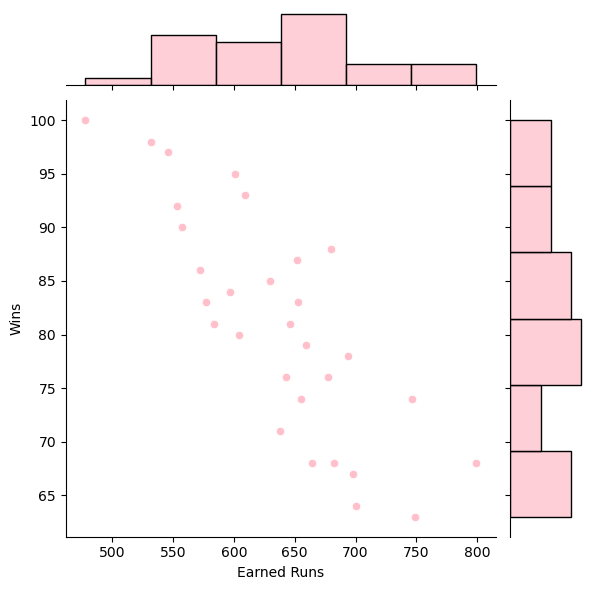

In [34]:
sns.jointplot(x='Earned Runs', y = 'Wins',data = bb_df, color='pink', palette='Set1')

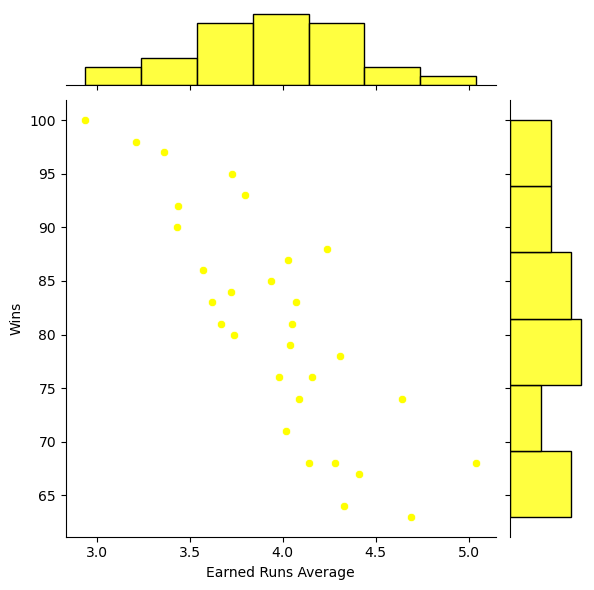

In [35]:
sns.jointplot(x='Earned Runs Average', y = 'Wins',data = bb_df, color='yellow', palette='Set1')

<Figure size 1000x1000 with 0 Axes>

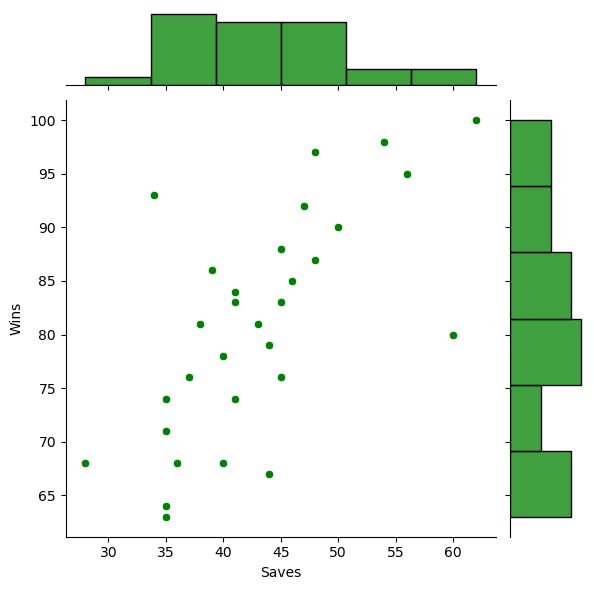

In [36]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Saves', y = 'Wins',data = bb_df, color='green', palette='Set1')

- A save is rewarded to the relief pitcher who finishes a game for the winning team inder certain circumstances.
- Here with increase in the number of save increases the number of wins

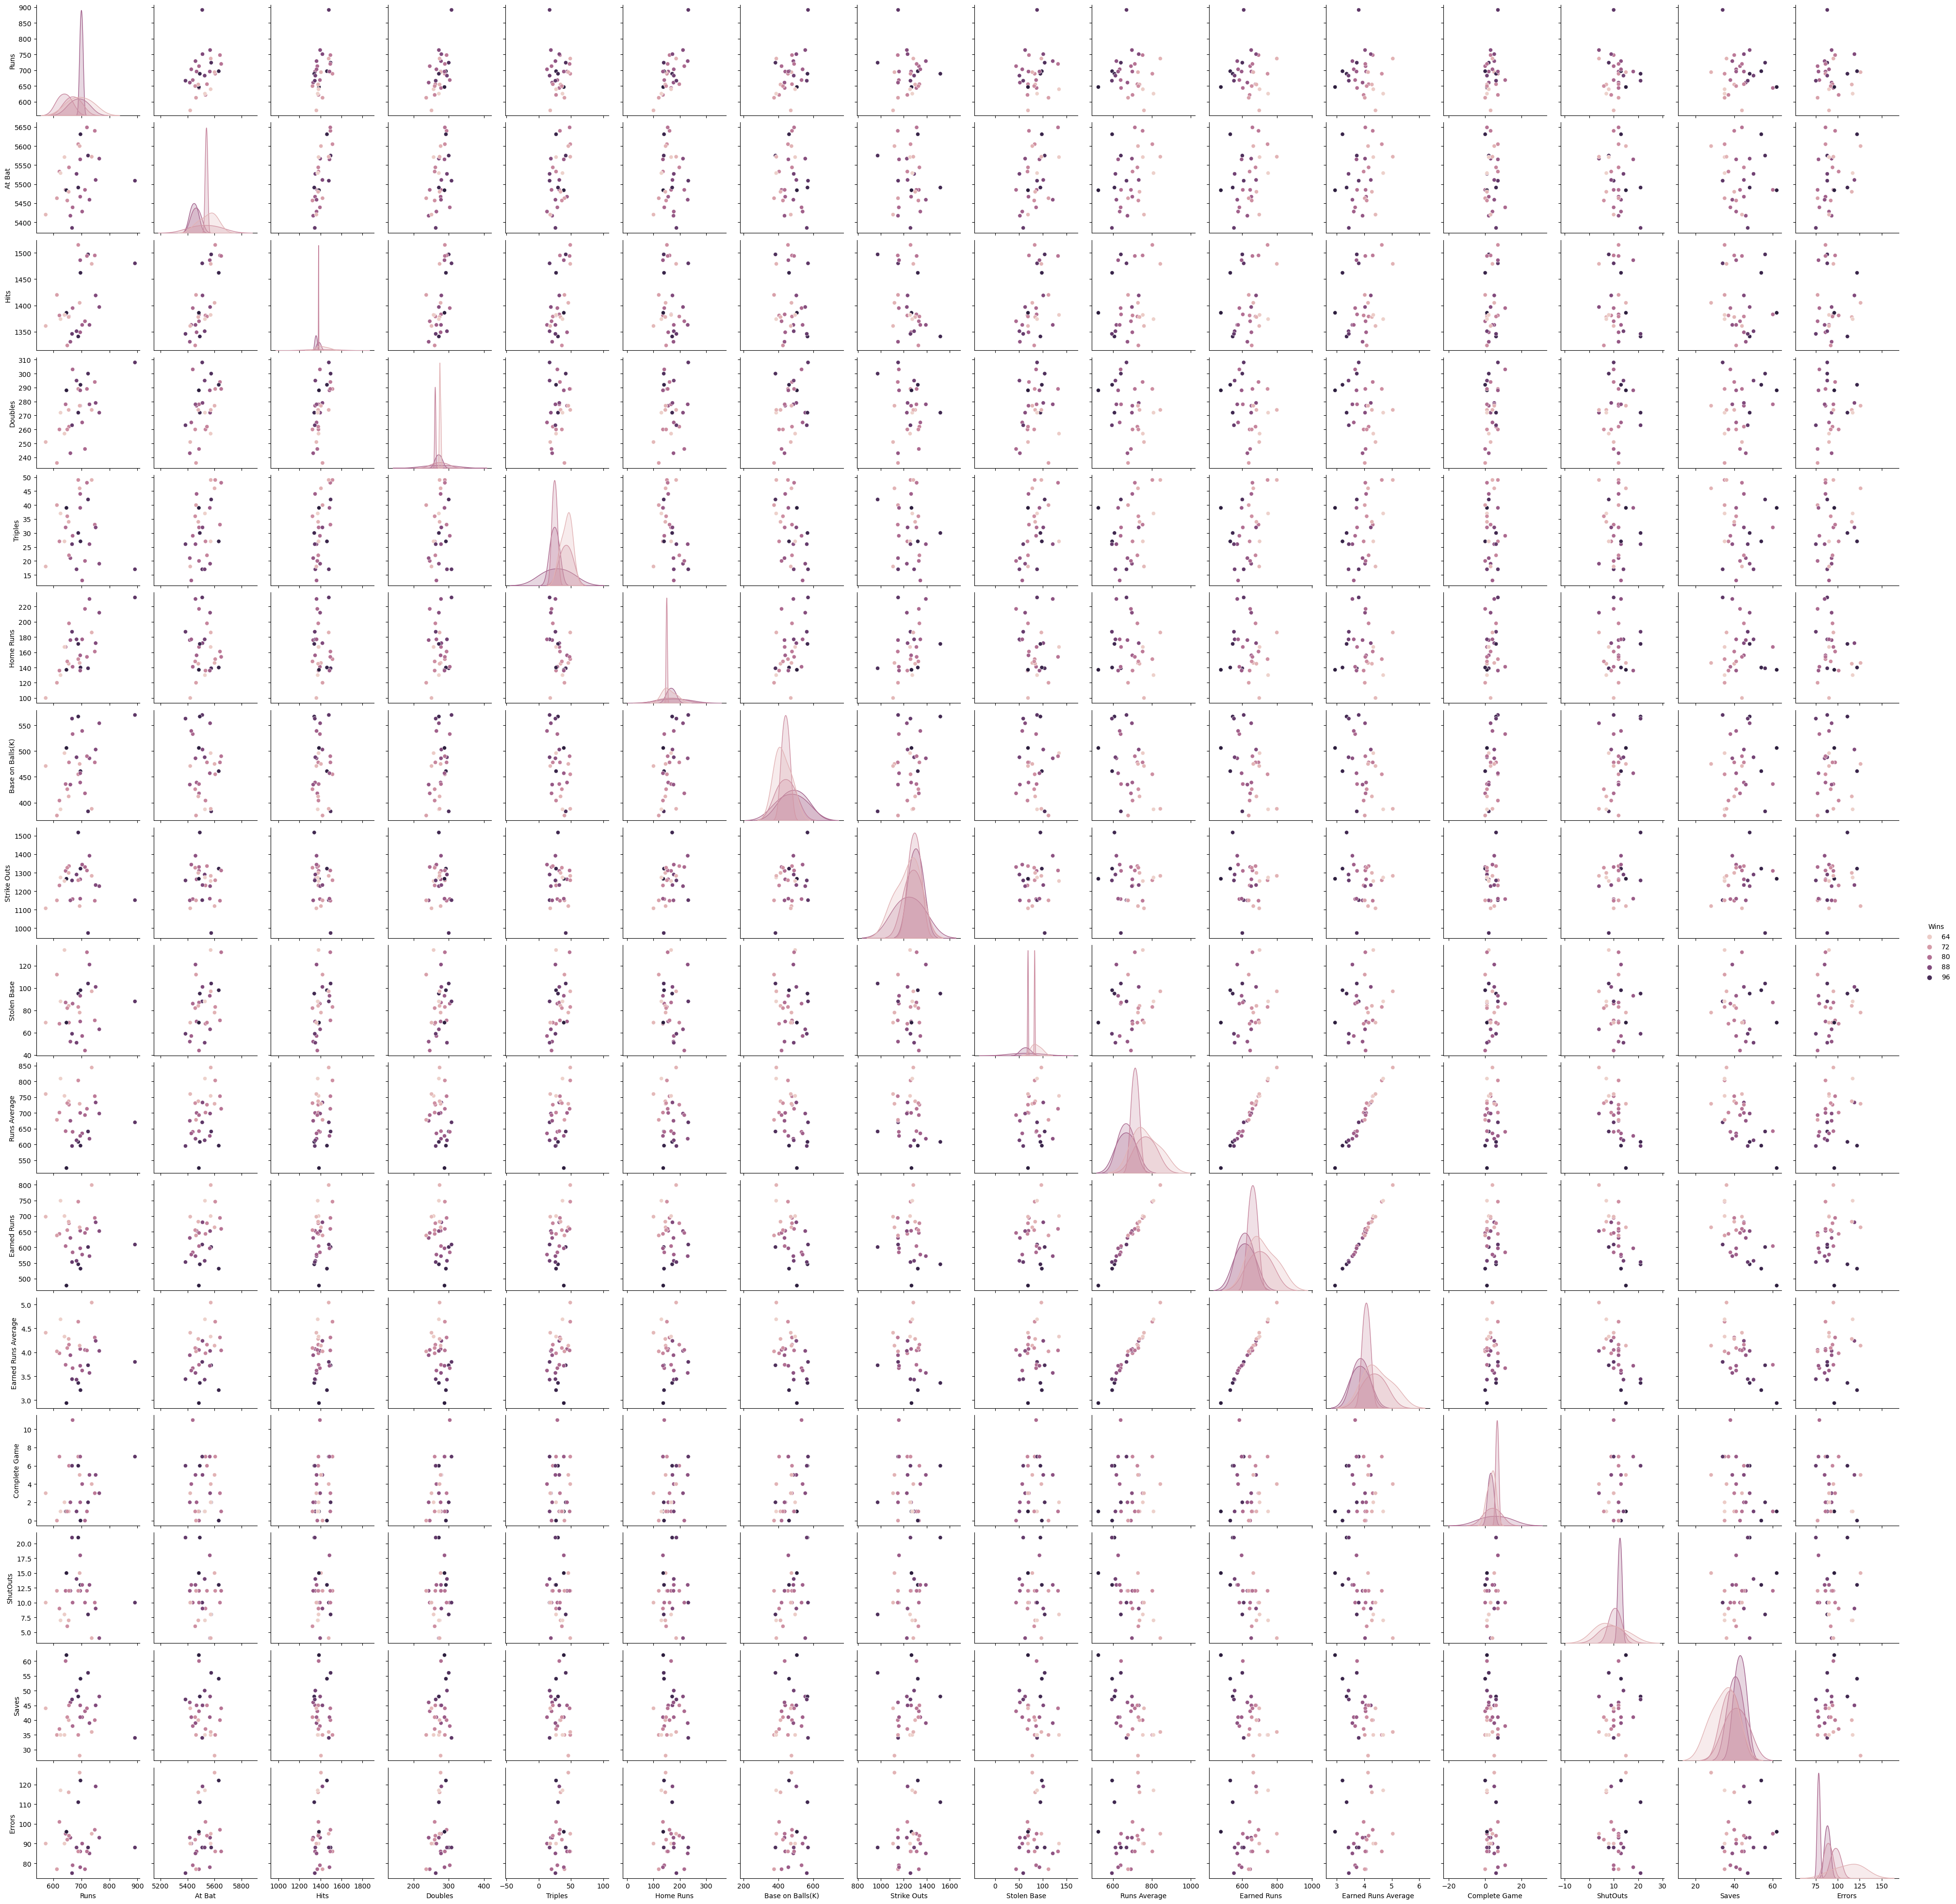

In [37]:
sns.pairplot(bb_df, hue='Wins')

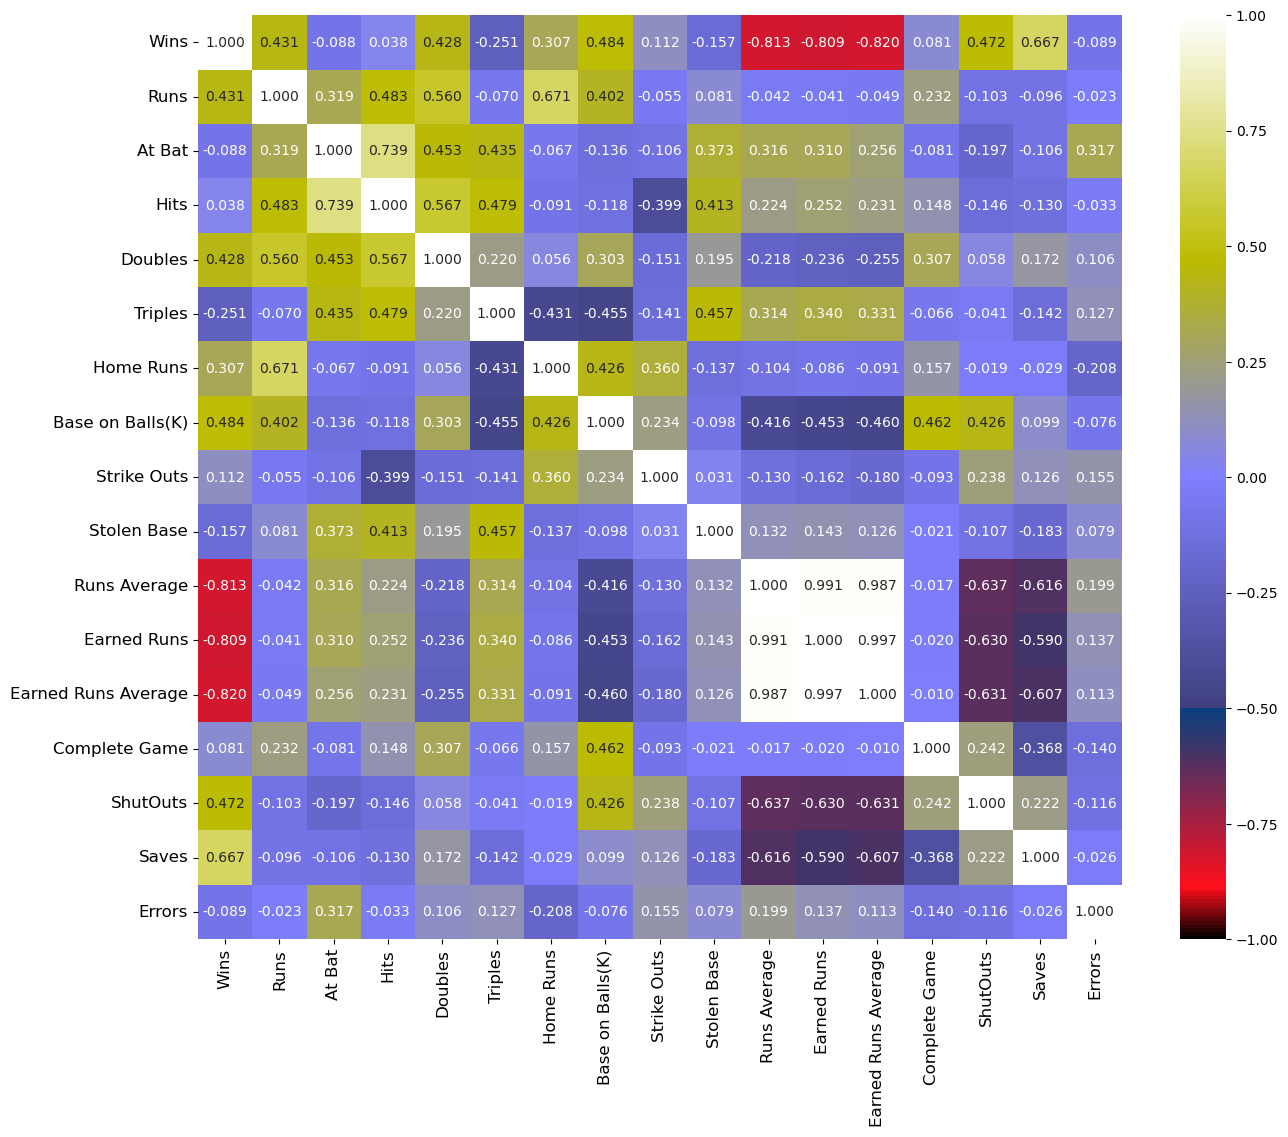

In [38]:
plt.figure(figsize = (15,12))
sns.heatmap(bb_df.corr(), vmin=-1,vmax=1,annot=True, square=True, fmt='0.3f',annot_kws={'size':10},cmap='gist_stern')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### Outliers Detection and Removal

In [39]:
z = np.abs(zscore(bb_df))
threshold = 3
bb_df1 = bb_df[(z<3).all(axis=1)]

In [40]:
print('\033[1m'+'Shape of Dataset after removing outliers :' + '\033[0m',bb_df1.shape)

Shape of Dataset after removing outliers : (29, 17)


Data Loss

In [41]:
print('\033[1m' + 'Percantage Data Loss : ' + '\033[0m',((30-29)/30)*100,'%')

Percantage Data Loss :  3.3333333333333335 %


## Feature Selection and Engineering

### 1. Skewness of Features

In [42]:
bb_df1.skew()

Wins                   0.119013
Runs                  -0.215364
At Bat                 0.169573
Hits                   0.783772
Doubles               -0.335304
Triples                0.090124
Home Runs              0.450862
Base on Balls(K)       0.151193
Strike Outs           -0.233815
Stolen Base            0.494966
Runs Average           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Game          0.854980
ShutOuts               0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

1. Optimal range for skewness is -0.5 to 0.5
2. Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

##### Transforming positive or right skew data using boxcox transformation

In [43]:
bb_df1['Hits'] = boxcox(bb_df1["Hits"],-2)

In [44]:
bb_df1['ShutOuts'] = boxcox(bb_df1['ShutOuts'],0.5)

In [45]:
bb_df1['Saves'] = boxcox(bb_df1['Saves'],0.5)

In [46]:
EC = ['Errors','Complete Game']
ds = bb_df1[EC].copy()

In [47]:
column_trans = ColumnTransformer([('Errors',PowerTransformer(method='yeo-johnson',standardize = True),['Errors']),
                                ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson = column_trans.fit_transform(bb_df1)
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns = new_cols)
pd.concat([dataset], axis=1)
dataset.head()

Errors  Complete Game
0 -0.348265      -0.307098
1 -0.540820      -0.307098
2 -1.326125       2.011315
3  0.650818       1.264463
4 -0.540820       1.264463

In [48]:
bb_df1.reset_index(drop=True, inplace = True)
dataset.index=bb_df1.index
bb_df1[EC]=dataset[EC]

##### Skewness After Transforming Features

In [49]:
bb_df1.skew()

Wins                   0.119013
Runs                  -0.215364
At Bat                 0.169573
Hits                   0.000000
Doubles               -0.335304
Triples                0.090124
Home Runs              0.450862
Base on Balls(K)       0.151193
Strike Outs           -0.233815
Stolen Base            0.494966
Runs Average           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Game         -0.045947
ShutOuts              -0.085802
Saves                  0.370280
Errors                 0.065585
dtype: float64

### 2. Corrleation

In [50]:
bb_df1.corr()

Wins      Runs    At Bat      Hits   Doubles  \
Wins                 1.000000  0.390451 -0.085780 -0.025885  0.384886   
Runs                 0.390451  1.000000  0.438022  0.429083  0.469293   
At Bat              -0.085780  0.438022  1.000000  0.771485  0.490752   
Hits                -0.025885  0.429083  0.771485  1.000000  0.525668   
Doubles              0.384886  0.469293  0.490752  0.525668  1.000000   
Triples             -0.206737  0.134204  0.445604  0.574467  0.342419   
Home Runs            0.245697  0.586894 -0.064653 -0.219890 -0.098695   
Base on Balls(K)     0.447513  0.258450 -0.137850 -0.220426  0.211243   
Strike Outs          0.156469  0.081158 -0.111243 -0.375825 -0.096772   
Stolen Base         -0.169503  0.075323  0.373674  0.424369  0.194308   
Runs Average        -0.823176 -0.013858  0.315499  0.241583 -0.215196   
Earned Runs         -0.815308  0.007727  0.309146  0.278600 -0.224993   
Earned Runs Average -0.826952 -0.009122  0.254872  0.254635 -0.248212   
Complete Game        0.007696  0.155122 -0.059648  0.070020  0.227220   
ShutOuts             0.477949 -0.119300 -0.193987 -0.134500  0.088345   
Saves                0.754886  0.071589 -0.127766 -0.093443  0.258675   
Errors              -0.079633  0.039865  0.332002 -0.012712  0.152541   

                      Triples  Home Runs  Base on Balls(K)  Strike Outs  \
Wins                -0.206737   0.245697          0.447513     0.156469   
Runs                 0.134204   0.586894          0.258450     0.081158   
At Bat               0.445604  -0.064653         -0.137850    -0.111243   
Hits                 0.574467  -0.219890         -0.220426    -0.375825   
Doubles              0.342419  -0.098695          0.211243    -0.096772   
Triples              1.000000  -0.369299         -0.404852    -0.196586   
Home Runs           -0.369299   1.000000          0.336814     0.479914   
Base on Balls(K)    -0.404852   0.336814          1.000000     0.315566   
Strike Outs         -0.196586   0.479914          0.315566     1.000000   
Stolen Base          0.483818  -0.166072         -0.117622     0.038188   
Runs Average         0.312750  -0.092586         -0.425381    -0.140570   
Earned Runs          0.333731  -0.062094         -0.455832    -0.177655   
Earned Runs Average  0.325883  -0.070756         -0.465794    -0.195362   
Complete Game       -0.004496   0.118284          0.445335    -0.063129   
ShutOuts            -0.067667  -0.030256          0.434799     0.200067   
Saves               -0.236230   0.084263          0.197177     0.105667   
Errors               0.080498  -0.165883         -0.056106     0.164817   

                     Stolen Base  Runs Average  Earned Runs  \
Wins                   -0.169503     -0.823176    -0.815308   
Runs                    0.075323     -0.013858     0.007727   
At Bat                  0.373674      0.315499     0.309146   
Hits                    0.424369      0.241583     0.278600   
Doubles                 0.194308     -0.215196    -0.224993   
Triples                 0.483818      0.312750     0.333731   
Home Runs              -0.166072     -0.092586    -0.062094   
Base on Balls(K)       -0.117622     -0.425381    -0.455832   
Strike Outs             0.038188     -0.140570    -0.177655   
Stolen Base             1.000000      0.134315     0.146243   
Runs Average            0.134315      1.000000     0.991286   
Earned Runs             0.146243      0.991286     1.000000   
Earned Runs Average     0.128848      0.986781     0.997261   
Complete Game          -0.040524      0.062434     0.067069   
ShutOuts               -0.098740     -0.641778    -0.639589   
Saves                  -0.187605     -0.637543    -0.616471   
Errors                  0.070527      0.231036     0.165556   

                     Earned Runs Average  Complete Game  ShutOuts     Saves  \
Wins                           -0.826952       0.007696  0.477949  0.754886   
Runs                           -0.009122       0.155122 -0.119300 

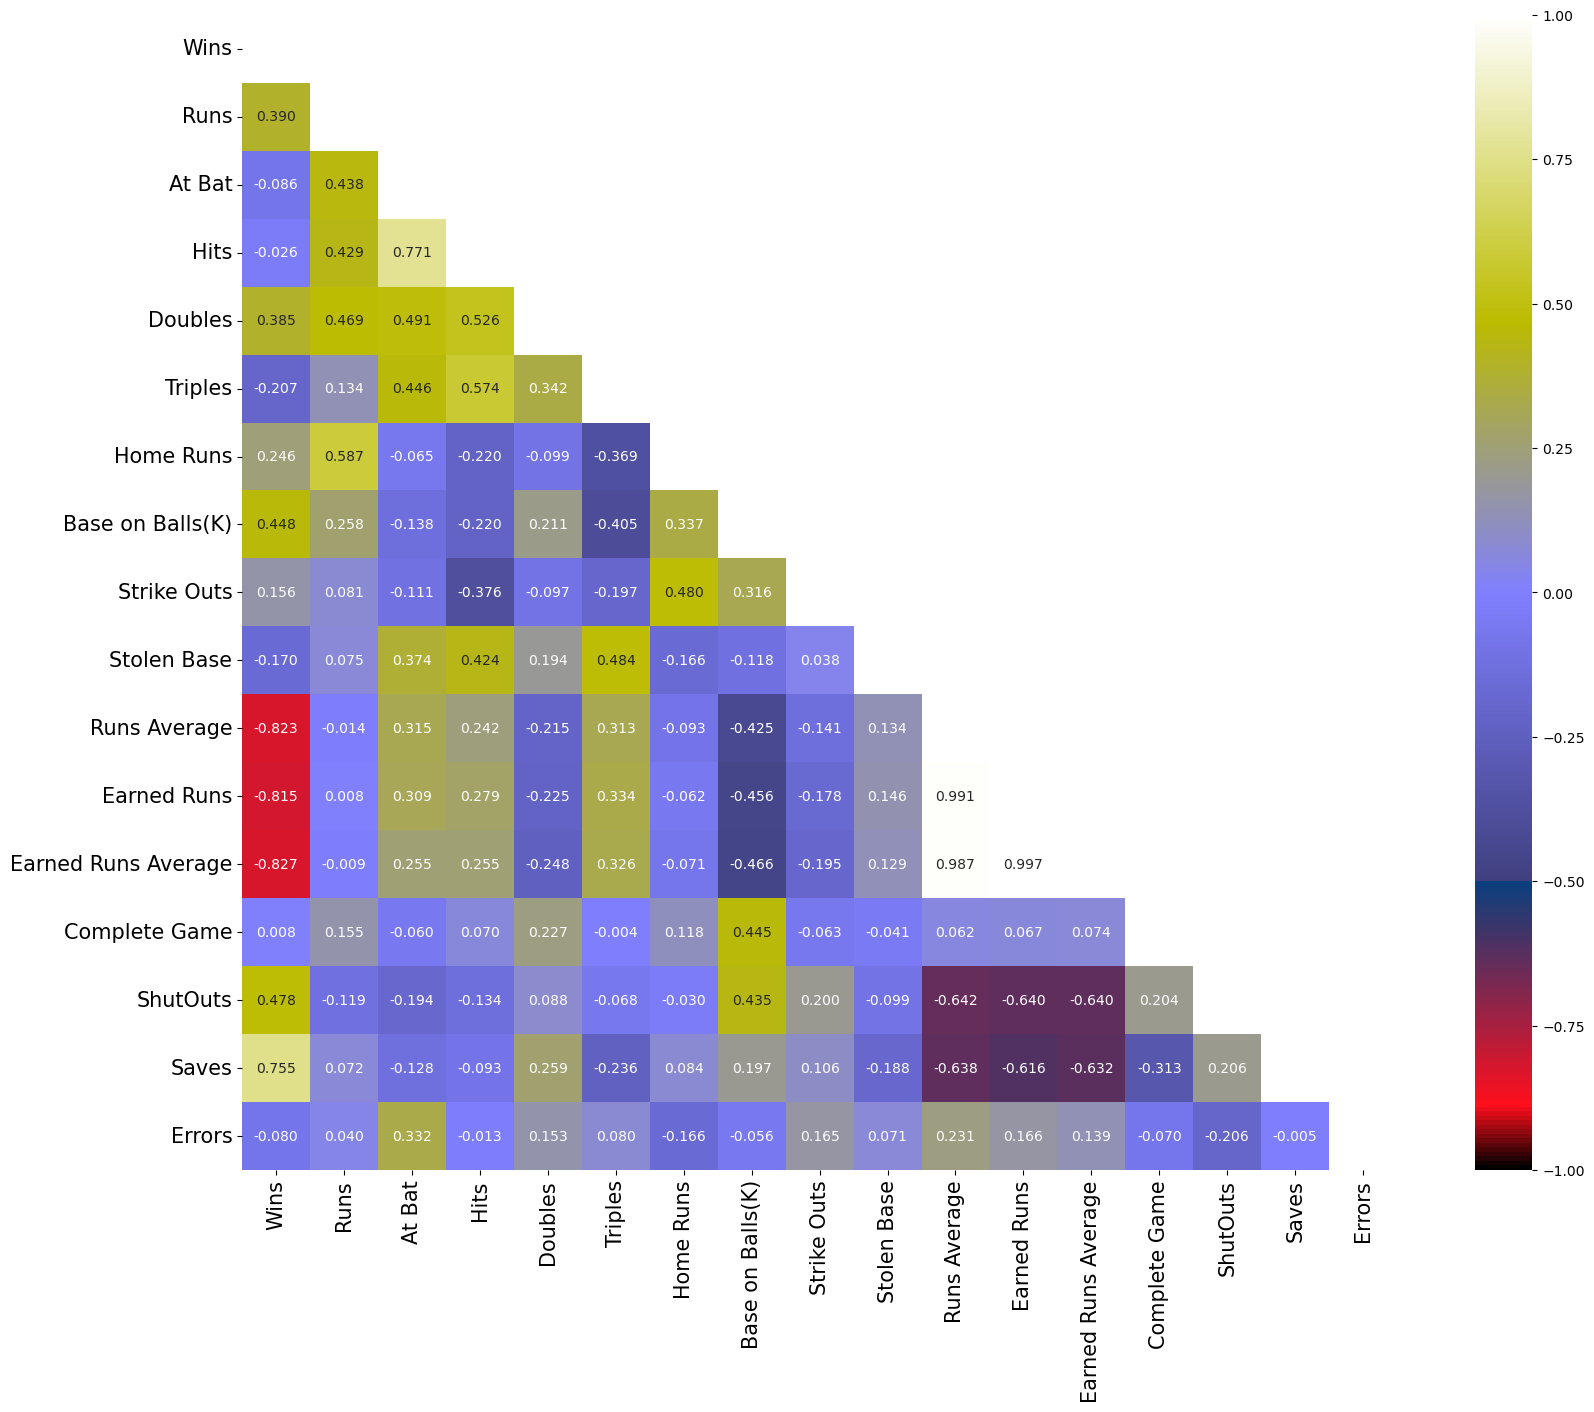

In [51]:
upper_traingle = np.triu(bb_df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(bb_df1.corr(),vmin=-1,vmax=1,annot=True,square=True,fmt='0.3f',annot_kws={'size':10},cmap='gist_stern',mask=upper_traingle)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

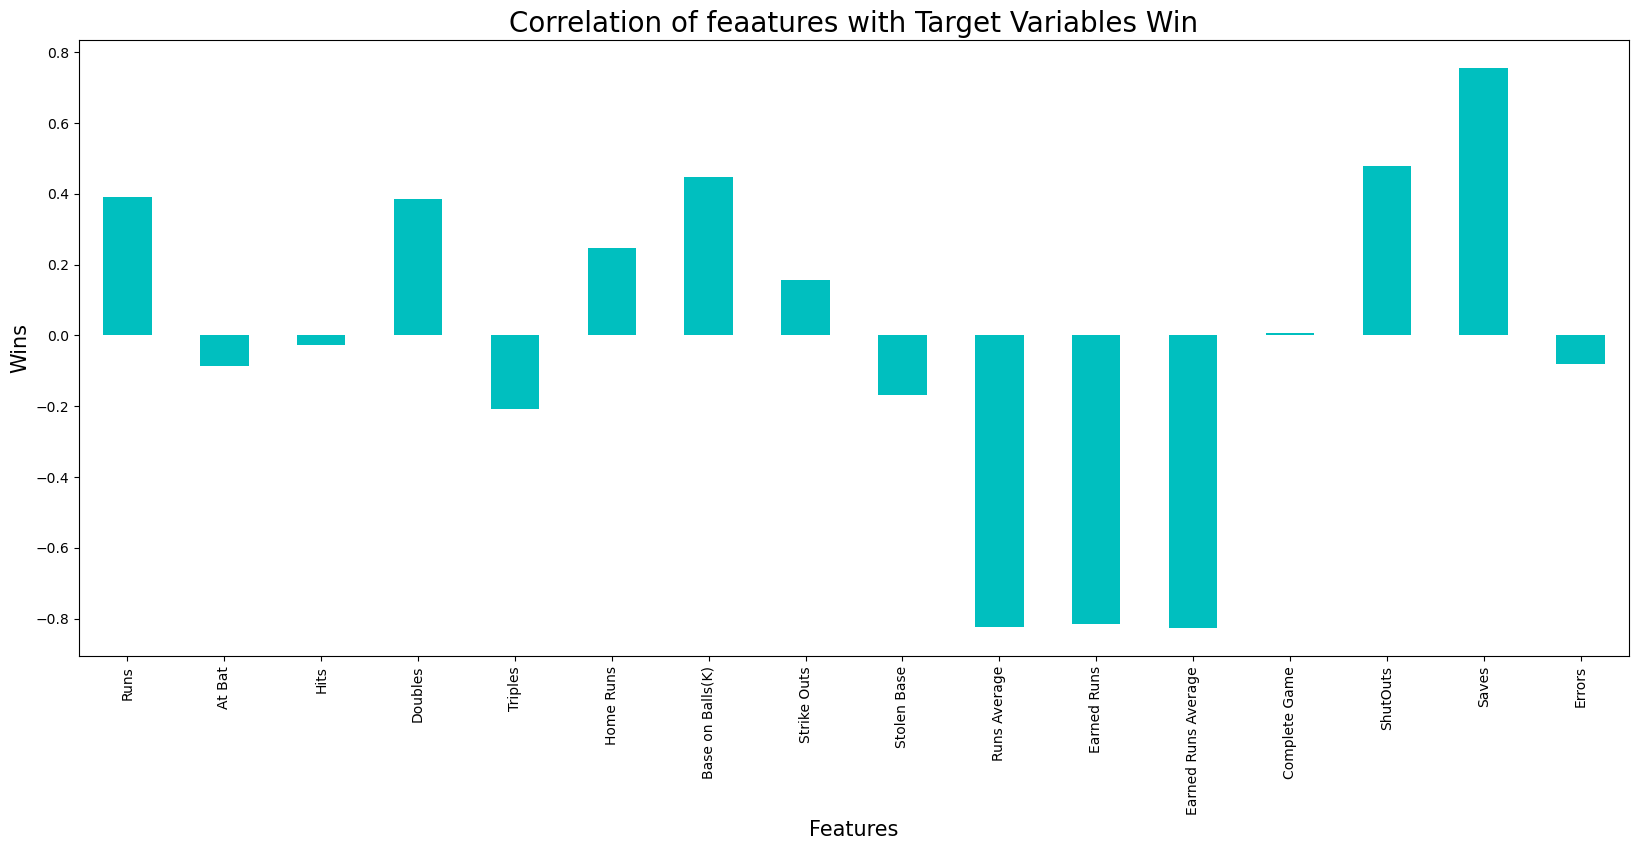

In [52]:
plt.figure(figsize=(20,8))
bb_df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color='c')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Wins',fontsize = 15)
plt.title('Correlation of feaatures with Target Variables Win', fontsize=20)
plt.show()

### 3. Checking Multicollinearity between features using variance_inflation_factor

In [53]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(bb_df1.values,i) for i in range(bb_df1.shape[1])]
vif['Features']=bb_df1.columns
vif

VIF             Features
0     1241.003534                 Wins
1     3248.685492                 Runs
2    67999.633336               At Bat
3    61783.303243                 Hits
4     1059.348657              Doubles
5       33.888446              Triples
6      249.058062            Home Runs
7      282.902409     Base on Balls(K)
8      414.389674          Strike Outs
9       25.992021          Stolen Base
10   18626.868530         Runs Average
11  153985.893657          Earned Runs
12  110924.930008  Earned Runs Average
13       3.479042        Complete Game
14      48.504592             ShutOuts
15     840.309823                Saves
16       1.885342               Errors

It is natuaral to have such high multicollinearity due to following reason :-
1. Earned Runs Average, Earned Runs, Runs Average are highly correlated with each other.
2. At Bat and Hits are correlated with each other. But at same time very poor correlated with target variable.
3. Another most important reason is data need to scale which we did not scale until now

##### Strategy to Address Multicollinearity :

1. Removing some of highly correlated features. But this will work here as most of input features are correlated with each other  either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

### Standard Scaling

In [54]:
X = bb_df1.drop(columns=['Wins'])
Y = bb_df1['Wins']

In [55]:
scaler = StandardScaler()
X_scale=scaler.fit_transform(X)

### PCA

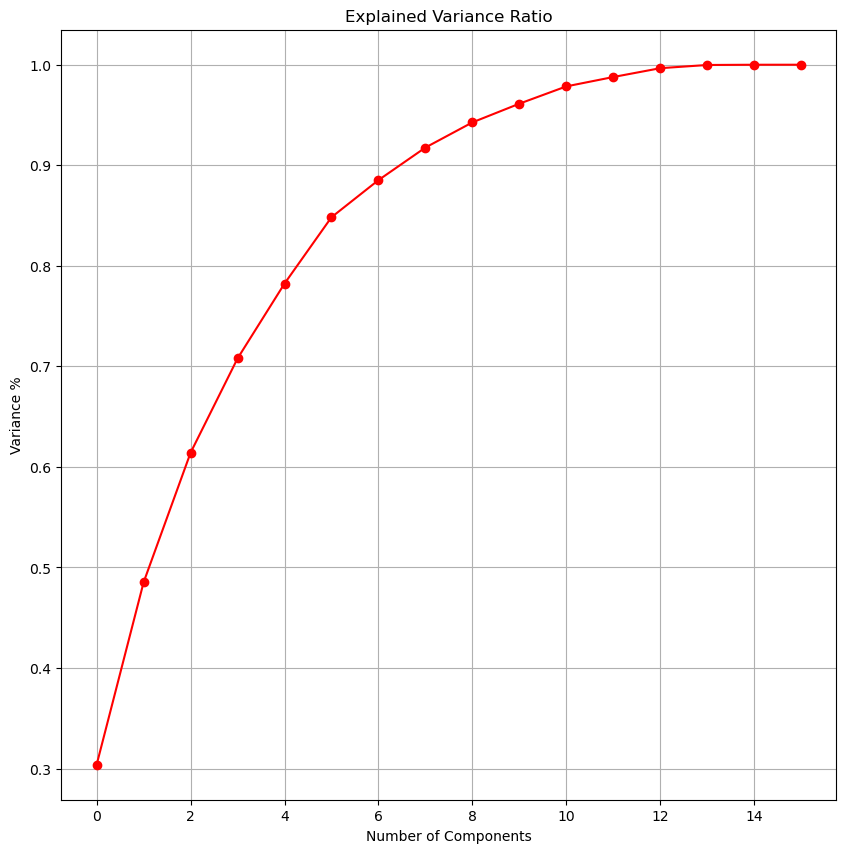

In [56]:
pca = PCA()
x_pca=pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

As per the Graph, we can see that 7 principal components atribute for 95% of variation in the data. We shall pick the first 7 components for our prediction

In [57]:
pca_new=PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [58]:
principle_x=pd.DataFrame(x_new, columns=np.arange(7))

#### Checking Multicollinearity after applying PCA

In [59]:
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(principle_x.values, i) for i in range (principle_x.shape[1])]
vif['Features']=principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

# Machine Learning Model Building

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x,Y,random_state=42, test_size=.3)
print('Training feature matrix size: ',X_train.shape)
print('Training target vector size: ', Y_train.shape)
print('Test feature matrix size: ',X_test.shape)
print('Test target vector size: ', Y_test.shape)

Training feature matrix size:  (20, 7)
Training target vector size:  (20,)
Test feature matrix size:  (9, 7)
Test target vector size:  (9,)


###### Finding Best Random State

In [61]:
maxR2_score=0
maxRS=0
for i in range (1,250):
    X_train, X_test, Y_train, Y_test=train_test_split(principle_x,Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train, Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


### Linear Regression : Base Model

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


#### Linear Regression Evaluation Matrix

In [63]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


#### Cross Validation

In [81]:
score=cross_val_score(lin_reg,principle_x,Y,cv=3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print('Mean CV Score:',score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score: 0.3354655028709037


### Finding best n_neighbors for KNN Regressor

In [84]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


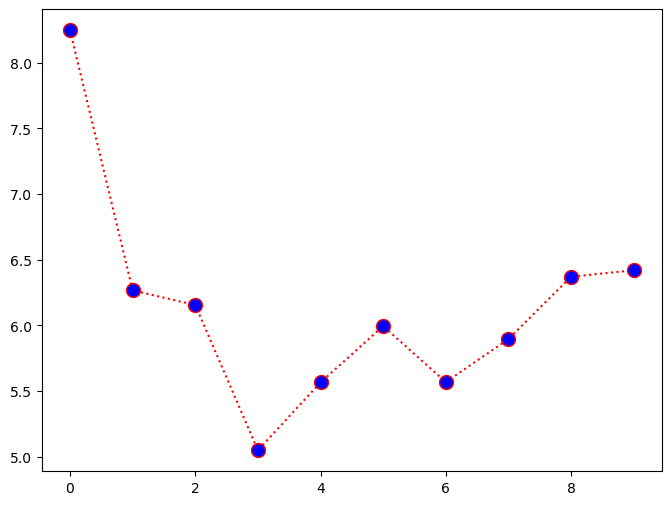

In [85]:
plt.figure(figsize=(8,6))
plt.plot(range(10),rmse_val,color='red', linestyle='dotted',marker='o',markerfacecolor='blue',markersize=10)

### Applying other Regression Model, Evaluation & Crossvalidation

In [86]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, random_state=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, random_state=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.652631547619045
Mean squared error : 35.67984108077949
Root Mean Squared Error: 5.97326050668975


 R2 Score :
0.6581060294699974


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.24990340768544472


InvalidParameterError: The 'max_iter' parameter of Lasso must be an int in the range [1, inf) or None. Got 100000.0 instead.

In [100]:
model = [rf,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 700x500 with 0 Axes>

## Hyper Parameter Tuning: GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'random_state':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [95]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [96]:
GCV = GridSearchCV(Lasso(),parameter, cv=5,n_jobs=-1, verbose=3)

In [97]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [ ]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')

In [98]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 29,
 'selection': 'random'}

In [103]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, positive = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550859
Root Mean Squared Error: 3.101191217992025


 R2 Score of Final Model :
0.9078435744699423




In [105]:
import joblib
joblib.dump(Final_mod,'Baseballn_Final.pkl')

['Baseballn_Final.pkl']